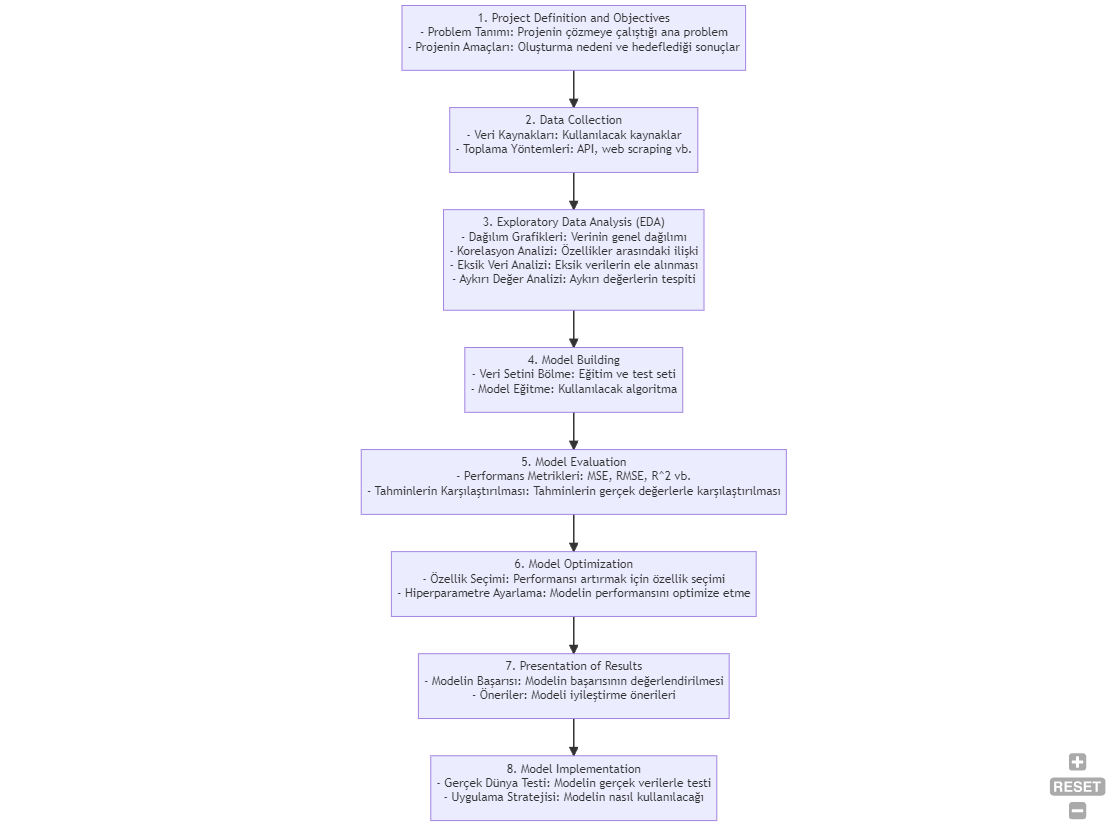

# About the Dataset

- **Auto Scout** datası, 2019'da çevrimiçi otomobil ticaret şirketi [AutoScout24](https://www.autoscout24.com) 'den alınmıştır ve 9 farklı otomobil modelinin birçok özelliğini içermektedir. 

- Bu projede, algoritmalar için zaten önceden işlenmiş ve hazırlanmış veri setini kullanacağız.

- Bu projenin amacı, makine öğrenimi algoritmalarını anlamaktır. Bu nedenle, düzenlenmiş veri üzerinde çalışacağınız için yoğun bir EDA sürecine ihtiyaç duymayacağız.

- Bu senaryoda, regresyon algoritmalarını kullanarak otomobil fiyatlarını tahmin edeceğiz.

- Başlarken gerekli kütüphaneleri içe aktarmamız gerekecek. Ayrıca modellemeye geçmeden önce birkaç ön işleme yapmamız gerekecek.

- Daha sonra sırasıyla Lineer Regresyon, Ridge Regresyon, Lasso Regresyon ve Elastic-Net algoritmalarını uygulayacağız. 

- Modellerimizin başarısını regresyon hata metrikleriyle ve cross validation yöntemiyle ölçebiliriz.

- Daha iyi sonuçlar için, hiperparametre ayarlama yaparak modellerinizin başarısını artırmaya çalışağız. 

- Model için feature ların önemlerini belirleyip kaynak tasarrufu için modelimizi en önemli feature lar ile ayarlayacağız. 

- Son olarak, algoritmaların performanslarını karşılaştıracağız.

- Ayrıca en başarılı tahmin oranına sahip olan algoritma üzerinde daha fazla çalışabilirsiniz.


1. **make_model**: Araçların marka ve model bilgisini içerir.
2. **body_type**: Araçların gövde tipini belirtir (örn. sedan, hatchback).
3. **price**: Araçların fiyat bilgisini içerir.
4. **vat**: KDV bilgisini içerir (genellikle araç satışlarında önemlidir).
5. **km**: Araçların kilometre bilgisini içerir.
6. **Type**: Araç türünü belirtir (örn. yeni, ikinci el).
7. **Fuel**: Kullanılan yakıt türünü belirtir (örn. benzin, dizel).
8. **Gears**: Araçların vites sayısını içerir.
9. **Comfort_Convenience**: Araçların konfor ve kolaylık özelliklerini içerir.
10. **Entertainment_Media**: Eğlence ve medya özelliklerini içerir.
11. **Extras**: Araçların ekstra özelliklerini içerir.
12. **Safety_Security**: Güvenlik özelliklerini içerir.
13. **age**: Araçların yaşı.
14. **Previous_Owners**: Araçların önceki sahip sayısını içerir.
15. **hp_kW**: Araçların beygir gücünü kilowatt cinsinden içerir.
16. **Inspection_new**: Araçların yeni muayene bilgisini içerir.
17. **Paint_Type**: Araçların boya tipini içerir.
18. **Upholstery_type**: Araçların iç döşeme tipini içerir.
19. **Gearing_Type**: Araçların şanzıman tipini içerir.
20. **Displacement_cc**: Motor hacmini santimetreküp (cc) cinsinden belirtir.
21. **Weight_kg**: Araçların ağırlığını kilogram cinsinden belirtir.
22. **Drive_chain**: Araçların çekiş türünü belirtir (örn. ön çekiş, arka çekiş).
23. **cons_comb**: Araçların kombinasyonel yakıt tüketimini litresi 100 kilometre başına belirtir.

**------------**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance

- 11. Prediction

# Import Modules, Load Data and Data Review

In [5]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

# EDA

In [2]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [6]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [29]:
df0.duplicated().sum()

1673

In [8]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
336,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
337,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
339,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
340,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
341,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,Renault Espace,Van,50950,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1647.000,front,7.600
15820,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15823,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15808,Renault Espace,Van,54982,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1647.000,front,7.600


In [9]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [10]:
duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [11]:
df.describe().T

# datayı tanıyoruz

# std, meanden büyük veya meane yakın bir değerse datamızın genelinde bir outler problemi olduğuna dair bize çıkarım sağlar

# "min" ile %25'lik ilk çeyrek arasında ve/veya %75'lik 3.çeyrek ile max arasında uçurum varsa datamızın genelinde 
# olmasa da sınırlı sayıda outlier değerler olabileceğine dair çıkarım sağlar

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [13]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [14]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
# <20 ile en soldan ":" işaretine kadar 20 karakterlik boşluk bırakılır ve feature isimleri bu boşluğa yazdırılır.
# ":" işareti tüm satırlarda aynı hizaya getirilmiş olur.

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [15]:
df.make_model.value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

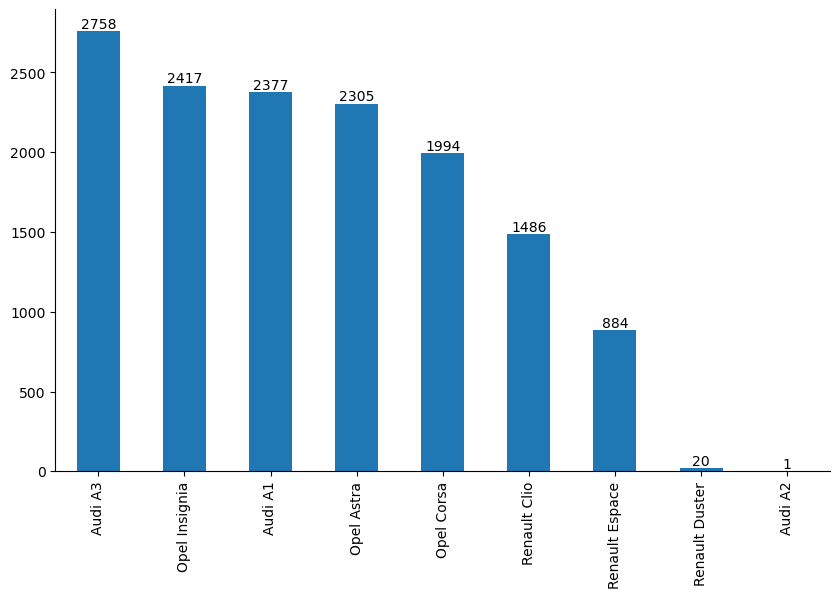

In [16]:
# Bu kod, DataFrame'imizdeki "make_model" sütunundaki uniq değerlerin sayısını hesaplar
# ve bu sayıları bar grafikte görselleştirir.

ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
    
ax.bar_label(ax.containers[0]);

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [17]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [18]:
df.drop(index=[2614], inplace =True)

In [19]:
df.shape

(14241, 23)

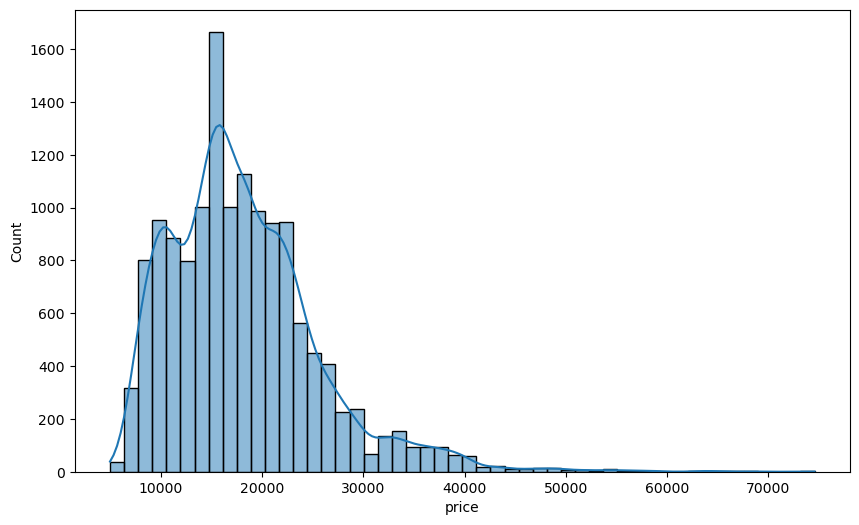

In [20]:
# linear modeller outlierlara çok hassas olduğundan histplot ile datadaki outlierları tespit etmeye çalışıyorum.
# ML için outlier demek datamızdaki bir gruba veya gruplara ait verilerin eğitim için yetersiz olması anlamına geldiğini
# unutmayalım. Aşağıdaki görsele bakarak 40.000 EURO üzerindeki araç sayılarının çok az olduğunu görüyoruz. Bu görsel
# üzerinden ilk insght olarak 40 bin EURO üzerindeki araçlar sayılarının eğitim için yetersiz kalabileceğini 
# değerlendirebiliriz. Ancak, yetersiz kalıp kalmadığını eğitimi yapmadan anlayamayız. Hem outlier olarak
# değerlendirdiğimiz gözlemleri drop edip hem de drop etmeden eğitimi yapıp skorları karşılaştırarak karar vermeliyiz.

# Ayrıca datanın tümü için histplota bakmak outlier konusunda bizi yanıltabilir. Outlier tespiti için datamızdaki
# verileri gruplandırıp (Audi A3, Audi A1, Renault cilo vb) ona göre outlier tespiti yapmalıyız

sns.histplot(df.price, bins=50, kde=True);

**Doğrusal modeller,** aykırı değerlere  hassastır çünkü bu modeller veri noktalarını en iyi uyan bir çizgi (veya daha yüksek boyutlu uzaylarda bir düzlem veya hiper düzlem) bulmaya çalışır. Aykırı değerler, modelin bu "en iyi uyum" hedefini büyük ölçüde etkileyebilir. İşte bunun bazı nedenleri:

1. **MSE Temelli Kayıp Fonksiyonları**: Doğrusal regresyon gibi birçok doğrusal model, ortalama karesel hata (MSE) temelli bir kayıp fonksiyonu kullanır. MSE, büyük hataların karesini alarak bu hataları daha da büyütür, bu nedenle tek bir aykırı değer bile toplam hatayı büyük ölçüde artırabilir.

2. **Düşük Baskınlık**: Doğrusal modellerde, her bir veri noktası modelin eğitilmesine katkıda bulunur. Ancak, aykırı bir değer, diğer tüm değerlere kıyasla çok daha büyük bir etkiye sahip olabilir. Bu, modelin bu aykırı değere aşırı şekilde uymasına neden olabilir.

3. **Doğrusal Varsayım**: Doğrusal modeller, veriler arasındaki ilişkinin doğrusal olduğunu varsayar. Bu, modelin aykırı değerlere özellikle duyarlı olmasına neden olabilir, çünkü bu aykırı değerler genellikle varsayılan doğrusal ilişkiyi bozar.

4. **Kaldıraç (Leverage) Etkisi**: Aykırı değerler, doğrusal bir modelin eğilimini (veya eğimini) büyük ölçüde değiştirebilir, bu da diğer tüm veri noktaları için tahminlerin yanıltıcı olmasına neden olabilir.

Birçok uygulamada, doğrusal modellerin aykırı değerlere olan bu duyarlılığı, modelin genelleme kabiliyetini ve güvenilirliğini azaltabilir. Bu nedenle, doğrusal modelleme yapmadan önce aykırı değerleri tespit etmek ve uygun bir şekilde ele almak genellikle önerilir.

Birçok istatistiksel ve makine öğrenimi modeli aykırı değerlere duyarlıdır. Ancak bu duyarlılık, modelin özelliklerine ve kullanılan optimizasyon tekniklerine bağlı olarak değişebilir.

**Aykırı Değerlere Duyarlı Modeller:**

1. **Doğrusal Regresyon**: Daha önce bahsettiğimiz gibi, doğrusal regresyon aykırı değerlere duyarlıdır.
2. **Lojistik Regresyon**: Lojistik regresyon, doğrusal regresyonun bir türüdür ve benzer nedenlerle aykırı değerlere duyarlı olabilir.
3. **K-En Yakın Komşu (KNN)**: KNN algoritması, k değeri küçük olduğunda aykırı değerlerden etkilenebilir.
4. **Tek Değişkenli Zaman Serileri Modelleri**: ARIMA gibi modeller aykırı değerlere duyarlı olabilir.

**Aykırı Değerlere Duyarlı Olmayan Modeller:**

1. **Decision Tree & Random Forest**: Bu modeller, veri noktalarını bölerek çalıştığı için genellikle aykırı değerlere karşı dayanıklıdır.
2. **Support Vector Machines (SVM) with RBF Kernel**: RBF kerneli olan SVM, aykırı değerlere karşı dayanıklı olabilir.
3. **Ensemble Methods**: Boosting ve Bagging gibi topluluk yöntemleri, birden fazla modeli birleştirerek genellikle aykırı değerlere karşı daha dayanıklı hale gelir.

**Özet**

Bir modelin aykırı değerlere duyarlılığı, o modelin yapısal özelliklerine ve kullandığı optimizasyon tekniklerine bağlıdır. Doğrusal modeller genellikle aykırı değerlere duyarlıdır, çünkü bu modeller veri noktaları arasında doğrusal ilişkiler arar ve MSE gibi kayıp fonksiyonları büyük hataları daha da büyütür. Bazı modeller (örneğin, karar ağaçları, robust regresyon) aykırı değerlere karşı daha dayanıklıdır ve bu tür verilerin etkisinden daha az etkilenir. Bu nedenle, model seçimi yapılırken veri setinin özellikleri ve aykırı değerlerin varlığı dikkate alınmalıdır.

In [22]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

# select_dtypes(exclude ="number") kodu ile sadece df'deki object featurları filtreleyebiliyoruz.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


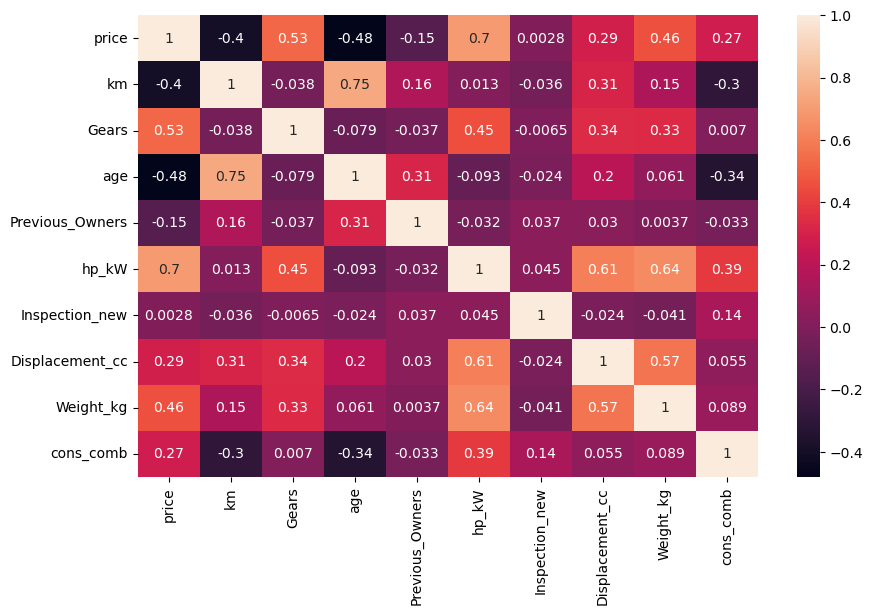

In [19]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

- Multicollinearity sorunu linear ve logisitc reg. gibi gradient descent tabanlı modellerde bir problem olarak karşımıza çıkar. 

- Multicollinearity bağımsız değişkenler arasında yüksek bir korelasyon olduğunda ortaya çıkar. Bu durum, bir bağımsız değişkenin diğer bağımsız değişkenlerle güçlü bir şekilde ilişkili olduğunda, diğer bağımsız değişkenlerin modeldeki önemini azaltabilir.

- Multicollinearity sorunu, modelin doğru bir şekilde yorumlanmasını zorlaştırabilir. Model katsayılarının doğru bir şekilde tahmin edilmesi zordur ve bazı değişkenlerin etkisinin yanlış yorumlanmasına neden olabilir. Bu nedenle, doğru sonuçlar elde etmek için, multikolinerite sorunu ortadan kaldırılmalıdır.

- Regulirazition algoritmaları overfiting problemini giderdiği gibi Multicollinearity sorununu da giderir.

Çoklu doğrusallık (multicollinearity), bağımsız değişkenler arasında yüksek derecede doğrusal bir ilişki olması durumunu tanımlar. Multicollinearity, bazı istatistiksel modeller için sorun oluşturabilirken, bazıları için bu kadar kritik olmayabilir.

**Multicollinearity Duyarlı Modeller:**

1. **Doğrusal Regresyon**: Doğrusal regresyon modeli, bağımsız değişkenler arasında yüksek korelasyon (multicollinearity) olduğunda ciddi şekilde etkilenebilir. Bu, regresyon katsayılarının tahminlerinin istikrarsız olmasına ve sonuçların yanıltıcı olmasına neden olabilir, çünkü model, bağımsız değişkenlerin etkilerini birbirinden ayrıştırmakta zorlanır.

2. **Lojistik Regresyon**: Lojistik regresyon da benzer şekilde multicollinearity'den etkilenebilir çünkü bu da bir tür doğrusal modeldir ve bağımsız değişkenler arasındaki yüksek korelasyon, parametre tahminlerinin güvenilirliğini azaltabilir.

3. **Ridge ve Lasso Regresyonu**: Ridge ve Lasso regresyonları, multicollinearity sorununa karşı dayanıklılık sağlayan düzenlileştirme (regularization) teknikleridir. Ancak, bu tekniklerin etkinliği, lambda (düzenlileştirme parametresi) değerinin doğru seçimine bağlıdır. Lambda'nın seçimi modelin performansı üzerinde önemli bir etkiye sahiptir ve bu seçim genellikle çapraz doğrulama yoluyla yapılır.

**Multicollinearity Duyarlı Olmayan Modeller:**

1. **Karar Ağaçları**: Karar ağaçları ve karar ağaçlarına dayalı modeller (örneğin, Random Forest), bağımsız değişkenler arasındaki ilişkilerden etkilenmezler çünkü bu modeller bölünme kriterlerine dayanarak çalışır ve her bir bağımsız değişkeni ayrı ayrı değerlendirir.

2. **Destek Vektör Makineleri (SVM)**: SVM, özellikle doğru kernel fonksiyonu seçildiğinde, bağımsız değişkenler arasındaki yüksek korelasyondan etkilenmez. Model, veri noktalarını optimum bir hiperdüzlemle ayırma yeteneğine sahiptir ve bu süreçte değişkenler arasındaki korelasyon önemli bir sorun teşkil etmez.

3. **Naive Bayes**: Naive Bayes sınıflandırıcısı, değişkenler arasındaki ilişkilere dayanmaz ve bağımsızlık varsayımı altında çalışır, bu nedenle multicollinearity'den etkilenmez.

**Multicollinearity Neden Sorun Teşkil Eder?**

- **Katsayıların Yorumlanabilirliği**: Multicollinearity varlığında, bağımsız değişkenlerin birbirleriyle yüksek derecede korelasyon göstermesi, bu değişkenlerin model üzerindeki etkisinin doğru bir şekilde yorumlanmasını zorlaştırır.
  
- **Tahminlerin İstikrarsızlığı**: Küçük veri değişiklikleri, model katsayılarında büyük dalgalanmalara neden olabilir, bu da modelin tahmin güvenilirliğini azaltır.
  
- **Test İstatistiklerinin Güvenilmezliği**: Multicollinearity, istatistiksel testlerin sonuçlarını yanıltıcı hale getirebilir, örneğin, p-değerlerinin ve R-kare değerlerinin yanıltıcı olması gibi.

- Multicollinearity ile başa çıkmak için değişken seçimi, düzenlileştirme teknikleri veya ana bileşenler regresyonu gibi yöntemler kullanılabilir.

- Bu yöntemler, modelin tahmin güvenilirliğini artırarak ve katsayıların yorumlanabilirliğini iyileştirerek multicollinearity'nin olumsuz etkilerini azaltmaya yardımcı olabilir. 

In [24]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# +0.9 ile +1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

False

In [25]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# -0.9 ile -1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

False

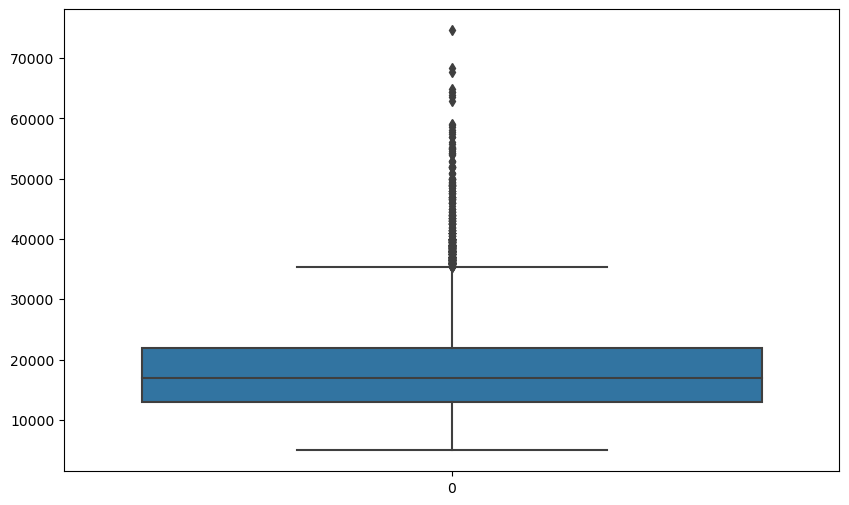

In [22]:
sns.boxplot(df.price);

# Boxplot üzerinden de outlierlar hakkında insightlar elde edebiliriz. Ancak bu insightlar bizi yanıltabilir.
# Bu yüzden değerlendirmemizi datanın geneli için değil, 
# datadaki gruplara (Audi A1, Audi A3, Reanult clio vb) göre yapacağız.

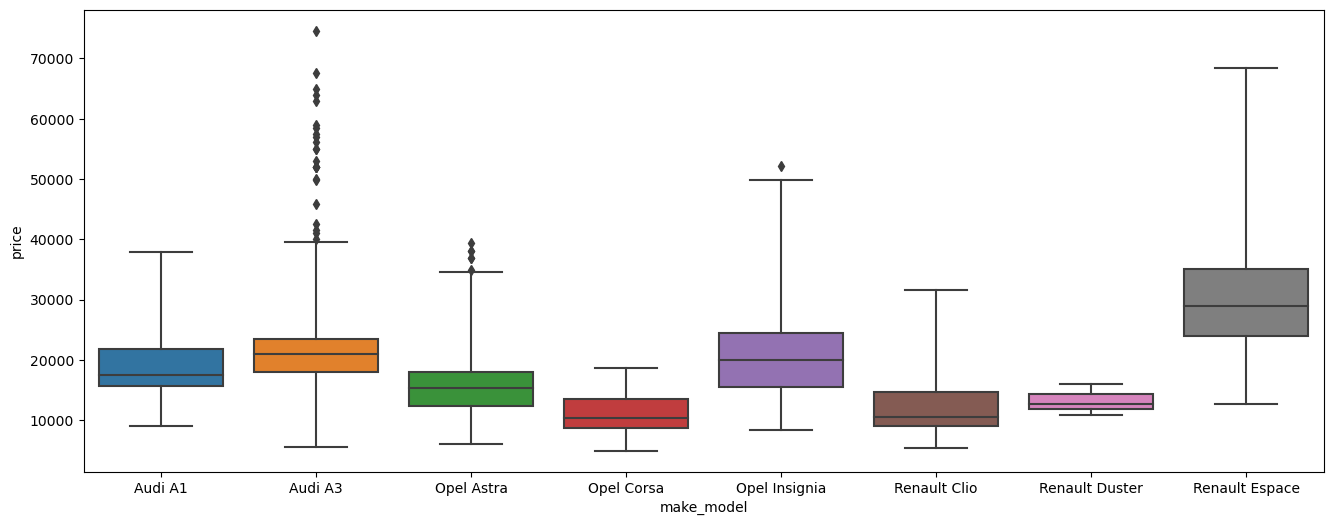

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# Aşağıdaki görsellere baktığımızda boxplota göre Audi A3, Opel Astra, Opel insignia, Renault clio için 3 wisker 
# baz alınarak outlier olabilecek gözlemleri görebiliyoruz. Kendi datalarınızda 
# bu görsellere göre her grup için ayrı wisker değerleri belirleyebilirsiniz.

# IQR hesaplamak için şu adımlar izlenir:

# Veriler küçükten büyüğe sıralanır.
# Verilerin %25'ini ve %75'ini temsil eden ilk ve üçüncü çeyrekler hesaplanır.
# IQR, üçüncü çeyrekten ilk çeyrek çıkarılarak elde edilir.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
# IQR = Q3-Q1
# lower_lim = Q1-1.5*IQR
# upper_lim = Q3+1.5*IQR

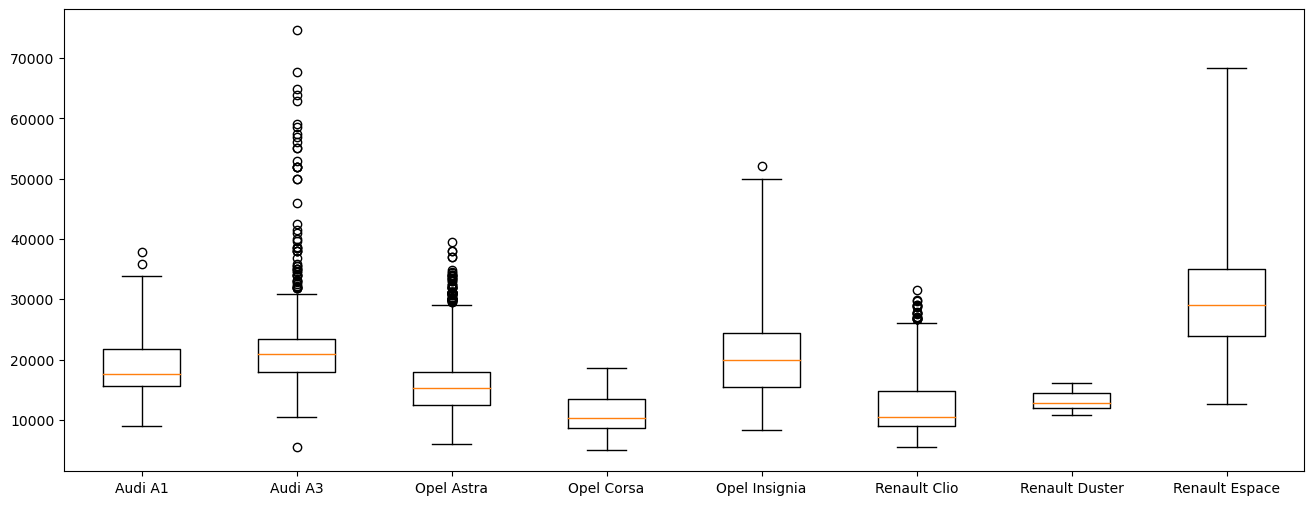

In [24]:
# Seaborn'un boxplot fonksiyonu tüm kategoriler için aynı 'whis' değerini kullanır, bu nedenle
# her bir kategoriyi ayrı ayrı çizmek için matplotlib'in boxplot fonksiyonunu kullanacağız.

whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

plt.figure(figsize=(16,6))

for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    plt.boxplot(model_data, positions=[i], whis=whisker_values[make_model], widths=0.5)
    
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()

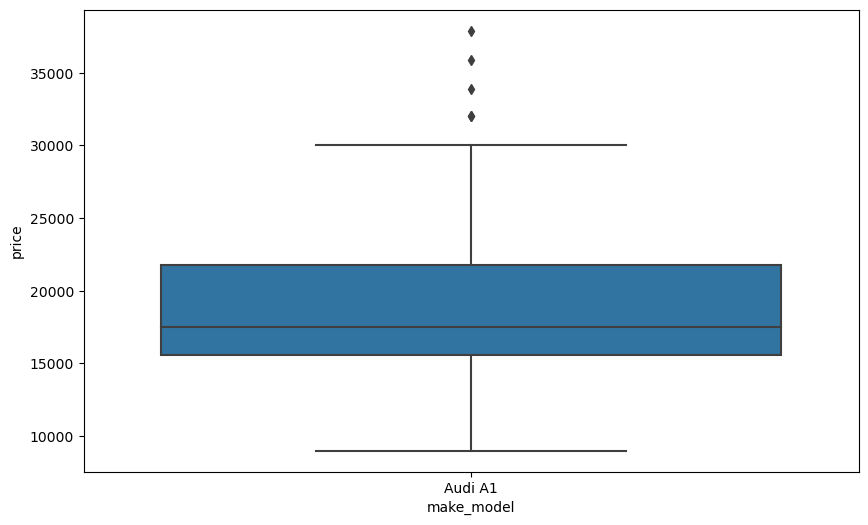

In [25]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [26]:
df[df["make_model"]== "Audi A1"]["price"]

# Audi A1'lerin fiyatları. Bu kodu kullanarak her bir araba için outlier değerleri tespit etmeye çalışacağız.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2377, dtype: int64

In [27]:
# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz gözlemleri tespit ediyoruz.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## Get dummies 

**get_dummies()** yöntemi, kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.

Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.

In [28]:
# Bu kod, sütunlarımızdaki her bir hücrede yer alan virgülle ayrılmış metinleri ayrıştırarak,
# bu metinlerin her bir öğesinin ayrı bir sütun olarak temsil edildiği yeni bir veri çerçevesi oluşturur.

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [29]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [30]:
df = pd.get_dummies(df, drop_first =True)

# drop_first=True parametresi, her bir özelliğin ilk kategorisine ait sütunu kaldırır. 
# Bu, overfitting ve multicollinarity önlemek için yapılır.

# Örneğin, "Fuel_Type" sütununda "Diesel", "Gasoline" ve "LPG" gibi üç kategori varsa, sütunlardan sadece ikisi
# (örneğin "Gasoline" ve "LPG") kodlanır ve "Diesel" kategorisi için referans olarak kullanılır.
# Bu sayede, "Gasoline" sütunu ve "LPG" sütunu, "Diesel" sütunu ile ilişkilendirilir ve herhangi bir çoklu doğrusal
# bağımsızlık sorununun önlenmesi sağlanır.
# Pandas versiyon farkından kaynaklı True/False yerine 0/1 olarak görüntülenebilir

In [31]:
# DataFrame'indeki boolean değerleri integer'a dönüştürür

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [32]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [33]:
df.shape

(14241, 133)

In [34]:
df.isnull().any().any()

False

In [35]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# datamızdaki tüm featurların target ile olan corr.larına bakıyoruz
# targetımız olan price ile corr.larını küçükten büyüğe sıralıyoruz. 
# Targetın kendisiyle olan corr.unu görmek istemediğimizden slicelama ([:-1]) yapıp -1 ile targetı ignore ediyoruz.

age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


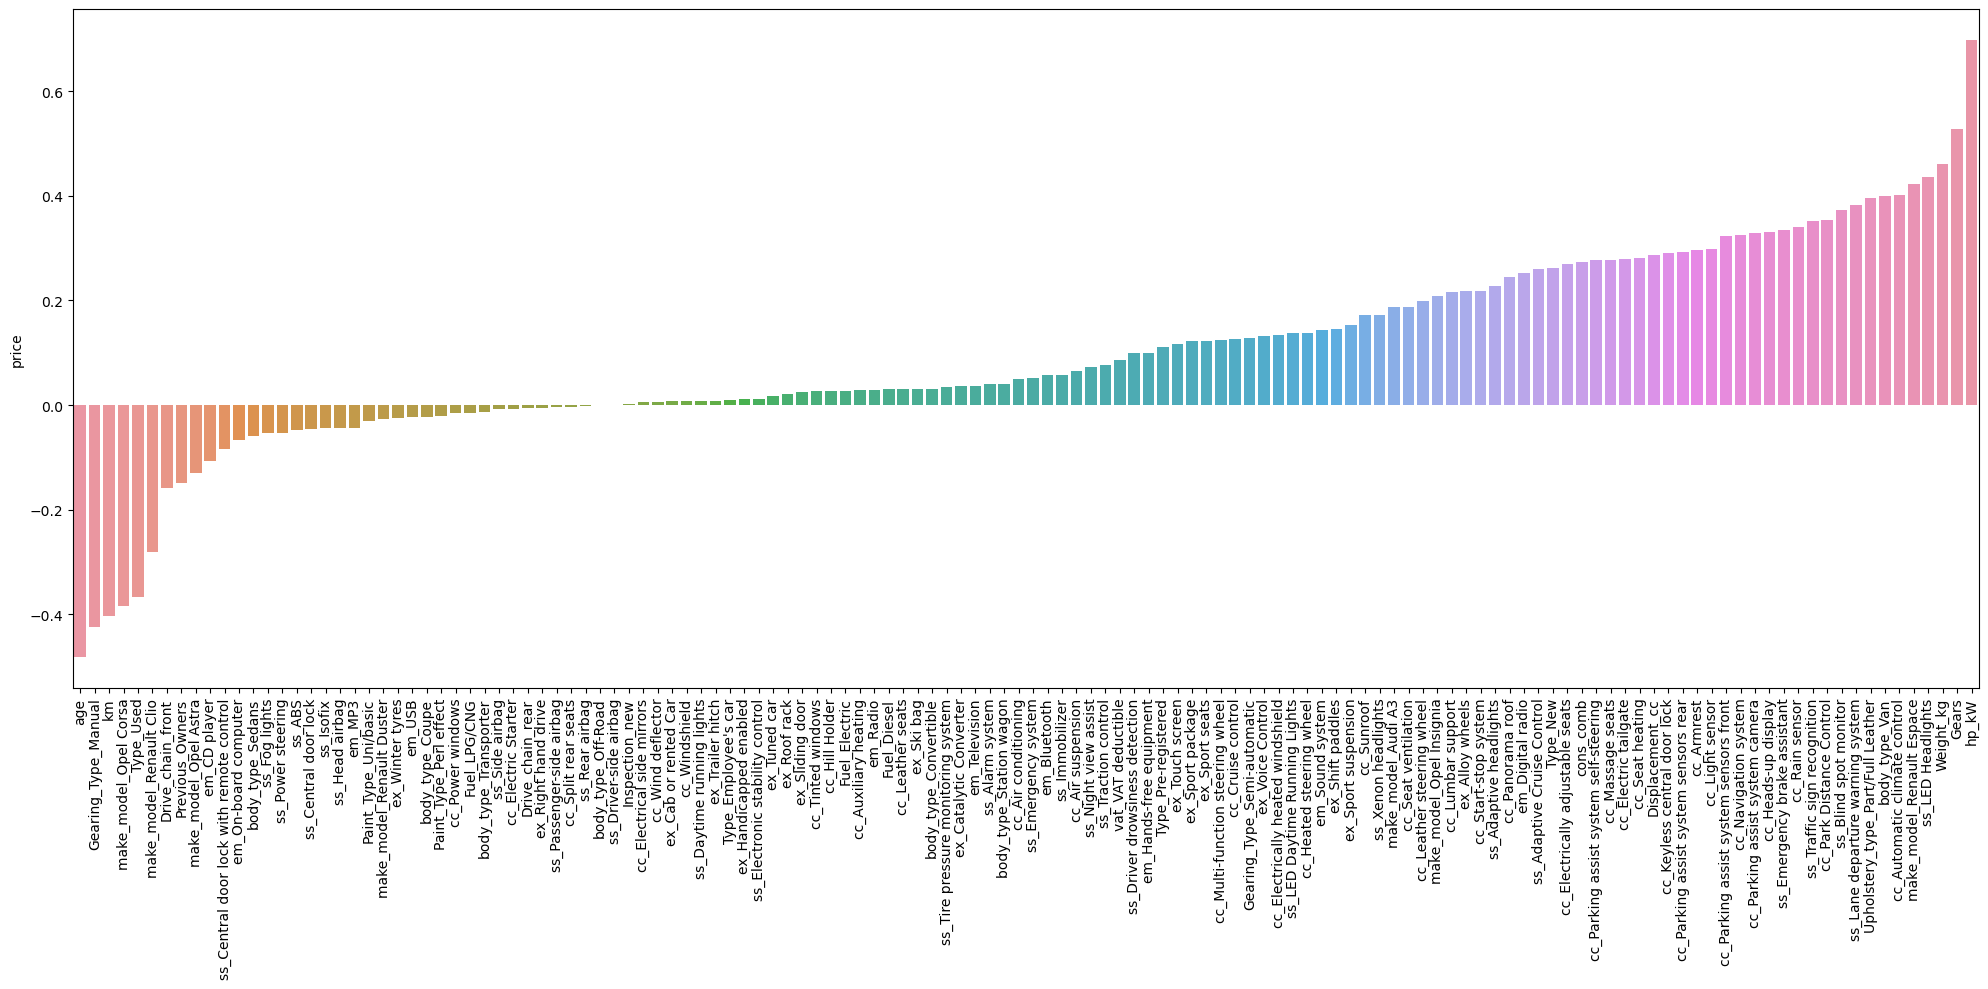

In [36]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# featureler ile target arasındaki corr.ları görselleştiriyoruz.

# Train | Test Split

**random_state=42**

**test size = 0.2**

**Veri Hazırlama ve Model Eğitimi**

1. **Veri Kümesinin Düzenlenmesi**: 
   - Modeli eğitmeye başlamadan önce, veri kümesini düzenlemek gerekir. Bu, veri temizleme, özellik mühendisliği ve aykırı değerlerin işlenmesi gibi adımları içerebilir.

2. **Eğitim ve Test Setlerine Ayırma**: 
   - Veri kümesi, genellikle eğitim ve test setleri olarak ikiye ayrılır. Eğitim seti, modelin öğrenmesi için kullanılırken, test seti modelin performansını değerlendirmek için kullanılır.

3. **Hedef Değişkenin Ayrılması**: 
   - Tahmin etmeye çalıştığınız hedef değişken (etiket), özelliklerden ayrılmalıdır. Model, bu hedef değişkeni tahmin etmeye çalışacaktır.

**Performans Değerlendirme**

1. **Performans Metrikleri**: 
   - Regresyon modelleri için çeşitli performans metrikleri kullanılabilir, örneğin, Ortalama Mutlak Hata (MAE), Ortalama Karesel Hata (MSE), R kare skoru gibi.

2. **Fonksiyon Tanımlama**: 
   - Modelin farklı performans metriklerini hesaplayan bir fonksiyon tanımlayarak, bu metrikleri kolayca değerlendirebilir ve karşılaştırabilirsiniz.

3. **Cross Validation Kullanımı**: 
   - Cross validation, modelin farklı veri örnekleri üzerindeki performansını değerlendirmek için kullanılır. Model, eğitim setinin farklı alt kümeleri üzerinde eğitilir ve her bir alt kümenin performansı değerlendirilir. Bu puanların ortalaması, modelin genel performansını verir.

**Özet**

Veri hazırlama süreci, eğitim ve test setlerinin ayrılması, hedef değişkenin belirlenmesi ve model eğitimi, makine öğrenimi projelerinin temel adımlarındandır. Modelin performansını değerlendirmek için çeşitli metrikler ve cross validation yöntemi kullanılır. Bu yaklaşımlar, modelin genelleştirme yeteneğini daha doğru bir şekilde değerlendirmenize yardımcı olur.

In [37]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [38]:
X= df.drop(columns="price")
y= df.price

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitip sonrasında prediction almak için datayı train_test_split fonksiyonu ile train ve test setlerine bölüyoruz.
# Default olarak test_size=0.25'tir.
# Best practice 0.2, 0.25, 0.3 civarı değerler tercih edilir. Burdaki amaç train setine
# olabildiğince fazla veri sağlayabilmek. Özellikle küçük datalarda bu oran 0.1, 0.15 civarında seçilebilir

# random_state ile datayı train ve test e random olarak dağıtıyoruz ve 
# her seferinde train ve teste aynı dataları gönderiyoruz

In [40]:
X_train.shape

(11392, 132)

In [41]:
X_test.shape

(2849, 132)

# Implement Linear Regression

**Lineer Regresyon**

Bağımsız değişkenler üzerinden bağımlı değişkeni tahmin eder.

Tek bağımsız değişken varsa simple, birden çok bağımsız değişken varsa multiple lineer regresyon adı verilir.

Simple linear regression'da feature ile target arasında anlamlı bir ilişki varsa bu data linear regression için uygundur


**Lineer regression analizinin temel varsayımları**

1. **Lineer İlişki Varsayımı:** Bağımlı değişken ile bağımsız değişkenler arasındaki ilişkinin lineer bir şekilde ifade edilebileceği varsayılır. Yani, regresyon doğrusu ile değişkenler arasındaki ilişki lineer olmalıdır. Örneğin, X arttıkça Y de artmalı veya azalmalıdır.

2. **Bağımsızlık Varsayımı:** Gözlemler arasında bağımsızlık varsayılır. Yani, bir gözlemin sonucu diğer gözlemleri etkilememelidir.

3. **Normal Dağılım Varsayımı:** Hata terimleri (rezidüeller) normal dağılımlı olmalıdır ve herhangi bir pattern oluşturmamalıdır. Bu, regresyon modelinin tahminlerinin güvenilir olması için gereklidir.

4. **Bağımsız Değişkenlerin Bağımsızlığı:** Bağımsız değişkenler arasında çoklu doğrusallık (multicollinearity) sorunu olmamalıdır. Yani, bağımsız değişkenler birbirine çok yakın ve yüksek derecede korele olmamalıdır.

- Yşapka = b0 + b1X

- Yşapka= tahmin edilen değer

- b0= intercept (doğrunun y eksenini kestiği nokta)

- b1= slope = coefficient = weight

- X=bağımsız değişken

- Residual = Random error = e= Y-Yşapka

**Önemli olan erroru, hatayı minimize etmektir.**

**Best fit line**; hatalarımızı minimize edecek şekilde çiziyor. Tek bir feature olduğunda **Ordinary Least Squares** metot ile, birden fazla olduğunda ise **gradient descent** ile bulunur.

**Cost - loss function**; gerçek değer ile tahmin edilen değerlerlerin farkının karesini alıp ortalama hatayı buluyor.

**Gradient descent** optimizasyon algoritmasıyla, yapacağınız şey, w ve b değerini yavaş yavaş değiştirerek cost - lost fonksiyonunu azaltmak ve minimum değerine getirmeye çalışmak olacak.

İteratif şekilde hatayı minimize etmeye çalışan bir algoritmadır.

**Bias**, bir modelin tahminlerindeki sistematik hatadır. bir modelin tahminleri gerçek değerlerden ne kadar uzaksa, o kadar yüksek bir bias vardır. Yüksek bias, modelin basit olması ve verilerin karmaşıklığını tam olarak yakalayamaması nedeniyle ortaya çıkabilir. Underfitting dolayısıyla

**Variance** ise, modelin farklı veri noktaları üzerindeki tahminlerinin ne kadar değişken olduğunu ifade eder. 
Aynı veri kümesi üzerinde birden çok kez eğitildiğinde farklı sonuçlar elde edilir.
Overfitting sonucunda ortaya çıkar.
Yüksek bir varyans, modelin verilere aşırı uyum sağladığını ve öğrendiği örüntülerin veri seti dışındaki yeni verilere genelleştirilemeyeceğini gösterir.

**bias-varyans trade-off**:
Bias ve variance arasında bir denge kurmak önemlidir. İdeal olarak, bir modelin hem düşük bias hem de düşük variance değerine sahip olması gereklidir. Bu, modelin verilerin karmaşıklığını doğru bir şekilde yakalayabilmesi ve genelleme yapabilmesi anlamına gelir.

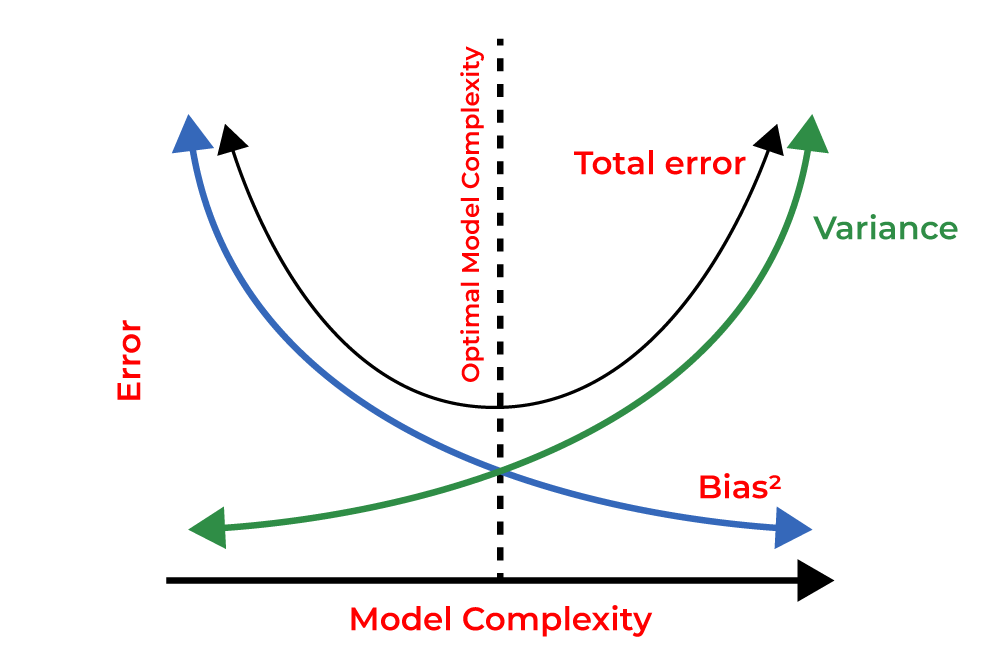

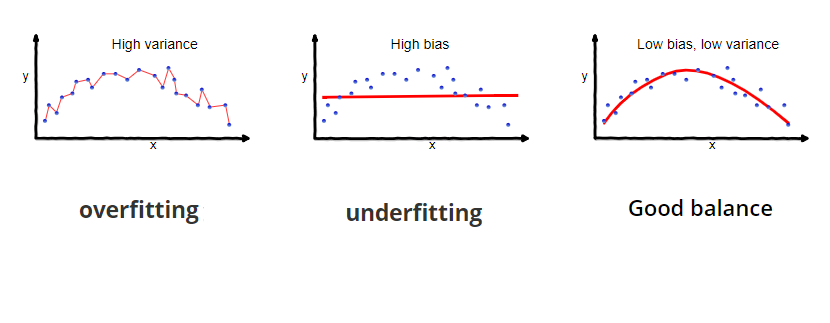

## Model

In [42]:
# train ve test setinin metriclerini karşılaştırabilmek için fonksiyonumuzu tanımlıyoruz.

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [43]:
from sklearn.linear_model import LinearRegression # LinearRegression algortimasını import ediyoruz.

In [44]:
lm = LinearRegression() # object tanimlama

# Algoritmamızı her zaman bir değişkene atıyoruz. Aksi taktirde prediction alırken hata alırız.

In [45]:
lm.fit(X_train,y_train) # veriyi vererek modeli linear regressiona gore egit 

# Burada lm yerine LinearRegression() yazarsak da kod çalışır. Ancak aşağıdaki prediction alırken LinearRegression()
# kullanırsanız hata alırsınız. Bu hatanın önüne geçmek için model =LinearRegression() atamasını mutlaka 
# yapıyoruz.

LinearRegression()

In [46]:
train_val(lm, X_train, y_train, X_test, y_test)

# önce test seti üzerinden metriclerimizi alıyoruz.
# daha sonra train seti üzerinden metriclerimizi de alarak modelin hiç görmediği data üzerinden aldığı scorlar ile eğitim 
# datası üzerinden aldığı scorları karşılaştırıyoruz. Eğer skorlar birbirne yakınsa model genelleyebiliyor demektir.
# Lakin skorlar arasında ciddi farklar varsa model genelleyemiyor demektir.

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


## Adjusted R2 Score

**Rkare- Rsquare, R2 (The Coefficient of Determination)** elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını
açıklayabiliyorum veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir.

0-1 arasında değerler alır. 1’e yaklaştıkça başarı oranı artar.

Negatif bir R2 skoru, modelin verileri açıklamak yerine verileri yanıltmakta olduğunu gösterir ve bu modelin kötü performans gösterdiğinin bir göstergesidir. Bu durumda, verilerin farklı bir modelle veya farklı bir veri özellikleri kümesi kullanılarak tekrar modellemesi gerekebilir.

**R-kare** = 1 - (SSR / SST)

**SSR (Residual Sum of Squares) - Reiduallerin Kareleri Toplamı**: 
SSR, gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamıdır. y - yşapka'nın kareler toplamı

Bu ifade, her bir gözlem için gerçek değer ile modelin tahmini arasındaki farkın karesinin toplamını temsil eder.

**SST (Total Sum of Squares) - Toplam Kareler Toplamı**:
SST, gerçek değerlerin ortalamasıyla gerçek değerler arasındaki farkların karelerinin toplamını ifade eder. y - ymean(gerçek değerler ortalaması)

Bu, verilerin genel değişkenliğini gösterir. 

- SSR, modelinizin ne kadar "yanıldığını" ifade eder. Düşük bir SSR değeri, modelinizin gerçek değerlere yakın tahminler yaptığı anlamına gelir.

- SST, verinizin içerdiği toplam değişkenliği gösterir. Bu, modelinizin tahmin etmesi gereken "maksimum değişkenlik" olarak düşünülebilir.

**R² skoru (R kare)**, regresyon modelinin ne kadar iyi performans gösterdiğini ölçen bir metriktir. Ancak bazı durumlarda yanıltıcı olabilir ve bu nedenle **Adjusted R² (Düzeltilmiş R kare)** değerine bakmak gerekebilir. İşte nedenleri:

**R² Skorunun Sınırlamaları**

1. **Model Karmaşıklığı**: R² skoru, modele eklenen her yeni feature ile artma eğilimindedir. Yani, modelinize ne kadar çok feature eklerseniz, R² değeri genellikle o kadar yüksek olur. Bu, modelin gerçekte olduğundan daha iyi performans gösterdiği yanılgısına yol açabilir.

2. **Feature Sayısı**: R², modeldeki feature sayısını dikkate almaz. Bu, çok sayıda feature içeren modellerin, gerçekte var olan ilişkiyi yakalamaktan ziyade, veriye aşırı uyum sağlamış olabileceği (overfitting) anlamına gelir.

**Adjusted R²'nin Avantajları**

1. **Özellik Sayısını Dikkate Alır**: Adjusted R², modeldeki feature sayısını dikkate alarak bu etkiyi dengelemeye çalışır. Modelinize daha fazla feature eklediğinizde, sadece bu yeni feature ın modelin performansını gerçekten iyileştiriyorsa Adjusted R² değeri artar.

2. **Daha Güvenilir Model Değerlendirmesi**: Adjusted R², özellikle birden fazla feature içeren modellerde, modelin performansını daha doğru bir şekilde değerlendirmek için kullanılır.

**Özet**

R² skoru, modele eklenen her yeni feature ile artabilir, bu da bazen yanıltıcı olabilir. Adjusted R², modeldeki feature dikkate alarak bu yanılgıyı azaltır ve genellikle birden fazla feature içeren modeller için daha güvenilir bir performans ölçüsü sağlar. Bu nedenle, modelin gerçek performansını daha doğru bir şekilde anlamak için Adjusted R²'ye bakmak önemlidir.

In [47]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [48]:
y_pred = lm.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [49]:
adj_r2(y_test, y_pred, df)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.8828492602064294

## Cross Validate

**Overfitting Kontrolü ve Cross Validation**

1. **Overfitting Kontrolü**: 
   - Overfitting, bir makine öğrenimi modelinin eğitim verilerine aşırı uyum sağlaması ve yeni, görülmemiş verilerde kötü performans göstermesi durumudur.
   - Overfitting kontrolü, eğitim (train) seti ve doğrulama (validation) seti üzerindeki skorları karşılaştırarak yapılır. Eğer eğitim setindeki skorlar doğrulama setinden çok daha yüksekse, bu overfitting'in bir işareti olabilir.

2. **Her Cross Validation Öncesi Model Sıfırlama**:
   - Model, her çapraz doğrulama iterasyonu öncesinde sıfırlanmalıdır. Aksi halde, önceki iterasyonlardan gelen bilgiler yeni iterasyona sızabilir (data leakage) ve yanıltıcı sonuçlara yol açabilir.

3. **return_train_score=True Kullanımı**:
   - Cross validation işleminde return_train_score=True seçeneği, her iterasyon için eğitim setinin skorlarını da döndürür. Bu, eğitim ve doğrulama skorlarını karşılaştırarak overfitting durumunu daha iyi anlamak için kullanışlıdır.

**Skorlama Metriklerinin Negatif Olması**

- **Maximize Edilen Skorlar**: Scikit-learn algoritmaları, skorları maksimize etmeye yönelik tasarlanmıştır. Ancak, MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error) gibi metrikler aslında minimize edilmesi gereken metriklerdir.

- **Negatif Skorlama**: Scikit-learn, bu minimize edilmesi gereken metrikleri negatif eksene kaydırarak, algoritmanın maksimize etme eğilimine uyum sağlar. Bu, MAE, MSE ve RMSE gibi metriklerin değerlendirilmesinde dikkate alınmalıdır.

**Cross_validate ve cross_val_score Fonksiyonları**

- **cross_val_score**: Tek bir metrik için skor döndürür.
- **cross_validate**: Birden fazla metrik için skor döndürebilir ve bu nedenle daha esnek ve geniş kullanım imkanları sunar.

Özetle, cross validation ve skorlama metriklerinin kullanımı, modelin genelleştirme yeteneğini değerlendirmek ve overfitting tespit etmek için kritik öneme sahiptir. Bu teknikler, modelin gerçek dünya verileri üzerindeki performansını daha doğru bir şekilde anlamak için kullanılır.

In [50]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [51]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.265,0.011,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.126,0.037,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.111,0.011,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.103,0.012,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.107,0.012,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.119,0.011,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.101,0.012,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.118,0.012,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.102,0.011,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.126,0.011,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [52]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [53]:
train_val(lm, X_train, y_train, X_test, y_test)

# train_val fonksiyonundan aldığımız train ve test seti scorları bize datamızda overfiting olup olmadığına dair insight 
# verir. 

# Ancak gerçekten overfiting olup olmadığı CV'dan alınan train ve validation scorlarının karşılaştırılması ile yapılır.

# Ayrıca, müşteriye vereceğimiz test scorlarının gerçekten tutarlı scorlar olup olmadığının kontrolünü CV'dan
# aldığımız validaiton scorları ile karşılaştırarak yapıyoruz. Scorlar biribirine yakınsa skorlar tutarlı, değilse scorlar
# tutarsız diyoruz.

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [54]:
2501/df.price.mean()

# hataya ortalamalardan baktığımız için tahmin etmek istediğimiz değerin ortalamasını alıp 
# hataların ortalamasını (error metriklerin ortalaması) tahmin etmek istediğimiz değerin ortalamasına böleceğiz

# iki ortalama değerin birbirine oranı ne kadar hata yaptğımızı gösterecek
# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre
# modelimiz ortalama %13.9 hata yapıyor.

0.13817480842212715

## Prediction Error

In [55]:
# sklearn.__version__
# pip install scikit-learn==1.2.1 --user

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

# son zamanlarda ML görselleştirmelerinde sıklıkla tercih edilen bir kütüphane
# residuallerin dağılımına hem train hem de test seti için bakabiliyoruz.

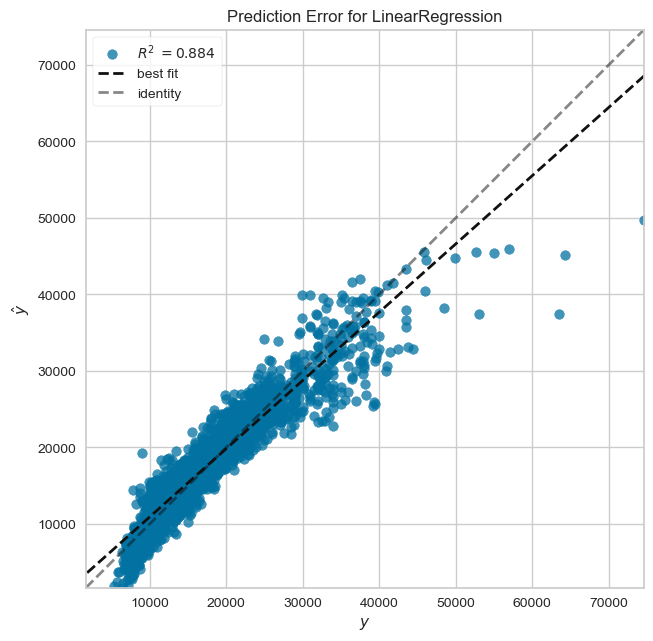

In [56]:
# hatalarımızın nasıl dağıldığına bakacağız
# modelimizi reset edeceğiz
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# prediciton error görseli ile modelimizin yaptığı tahminlerin ne kadar iyi olup olmadığını görebiliyoruz.
# train datası ile eğitiyoruz
# test datası ile skorlarını alıyoruz - grafikleri çizdiriyoruz

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor.
# silik (gri) olan identity line modelin tahminlerinin mükemmel olduğu noktaları,
# koyu renkli olan çizgi ise modelimizin eğitim sonrası çizdiği best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kadar iyi demektir.
# identity line da y değerleri ile tahmin edilen y değerleri farkının ortalaması sıfıra eşittir
# Bu da residualların 0 olması anlamına ve R2 değerinin de 1 olması anlamına gelir.

# Görsele baktığımızda 40 bin EURO ve üzerindeki fiyatlı arabaların best fit linemızı aşağıya doğru çektiğini görebiliyoruz
# Eğer ben datadan scorlarımı bozduğunu gördüğüm 40 bin EURO ve üzerindeki arabaları veya modeller bazında tespit ettiğim
# outlier fiyatlı arabaları datamdan çıkarıp bu data üzerinden yeniden modeli eğitirsem daha iyi scorlar alabilirim miyim

## Residual Plot

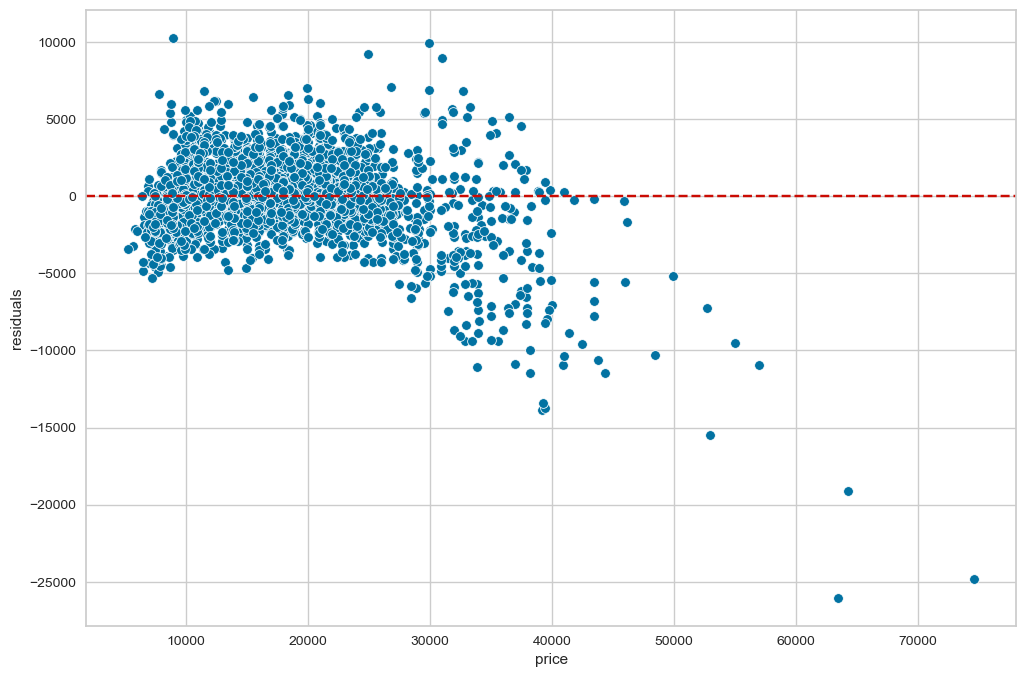

In [57]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# hata terimleri negatif değerler olarak hesaplandığında, grafiğin y-eksenindeki değerler pozitif hale getirilir.
# Bu, hata terimlerinin büyüklükleri arasındaki farkları daha net bir şekilde gösterir.

# residualler;
# 1- hatanın 0 olduğu eksenin her iki tarafına da yaklaşık olarak hem eşit hem de random  olarak dağılacak
# ayrıca pattern içermemeli
# 2- Bu dağılım normal dağılıma uygun olacak

# eğer bu şartlar sağlanıyorsa data linear reg. için uygun bir datadır diyebiliriz.

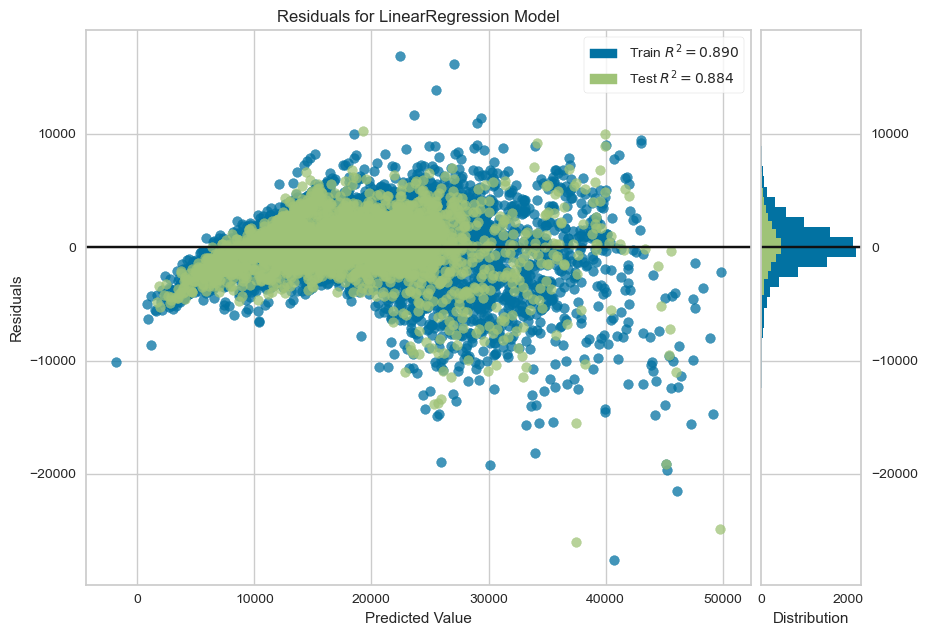

In [58]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

In [59]:
df1 = df[~(df.price>35000)]
df1.head()

# fiyatı 35.000'den büyük olmayan satırları (gözlemleri) filtrelemek için
# Tilde (~) operatörü, mantıksal bir değerin tersini almak için kullanılır. 

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [60]:
len(df[df.price>35000])

473

In [61]:
df0[df0.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [62]:
df0.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [63]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

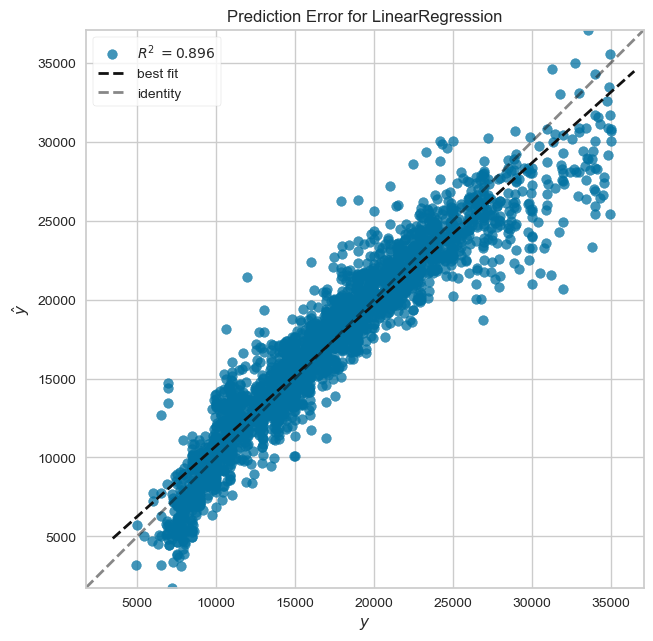

In [65]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [66]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [67]:
1894/df1.price.mean()

# Outlierları atmadan önceki ortalama tahmin hatamız %13.81'den %10.93'e düştü.
# Tahminlerimizde yaklaşık %2.88'lik bir iyileşme oldu.

0.1093750965362424

In [68]:
2501/df.price.mean()  # ilk modelimizin tahmin hatası oranı

0.13817480842212715

In [69]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [70]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [71]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
3950,20000,21453.754,-1453.754
14340,9990,8781.054,1208.946
11420,20490,21705.198,-1215.198
14977,27400,25727.205,1672.795
4254,18750,17222.443,1527.557
9169,8299,7393.752,905.248
13468,8490,7060.817,1429.183
15004,26994,25434.084,1559.916
10916,14890,15940.496,-1050.496
9607,9300,9484.715,-184.715


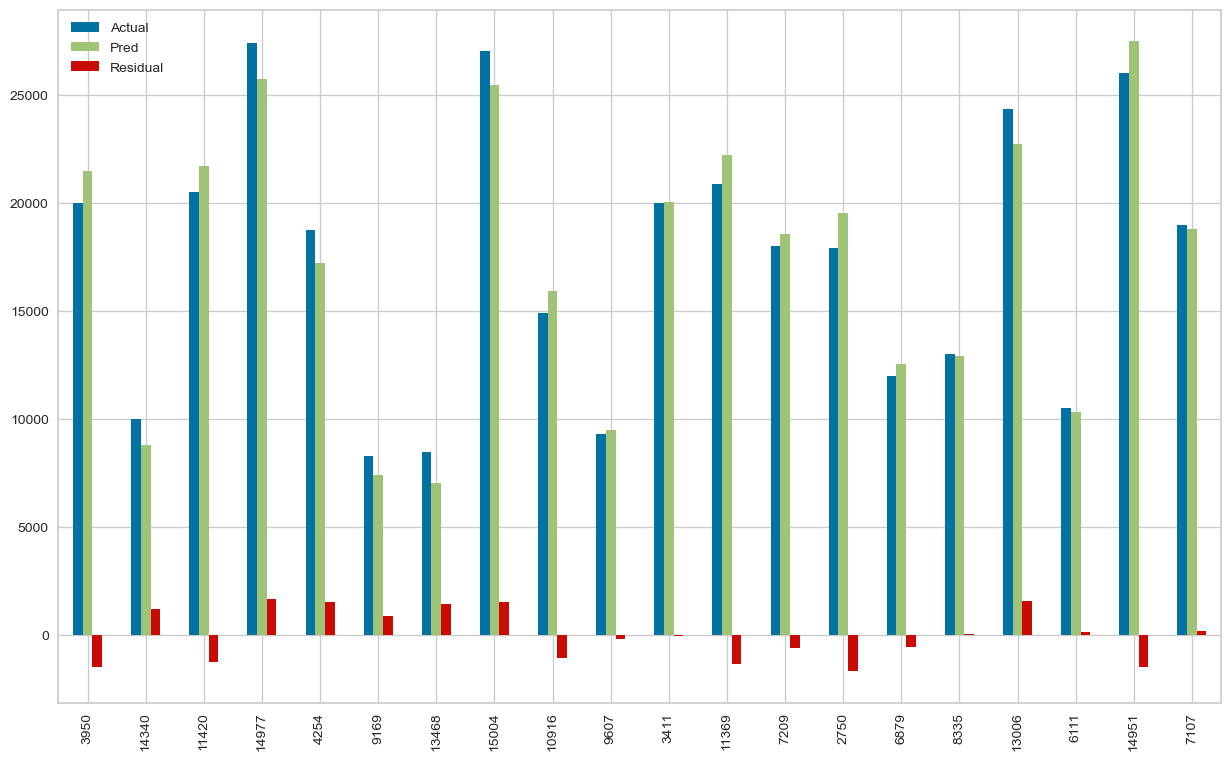

In [72]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

- Pozitif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin de artacağını gösterir.

- Negatif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin azalacağını gösterir.

- Katsayının mutlak değeri ne kadar büyükse, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi o kadar büyük demektir.

- Katsayı sıfıra yakınsa, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi zayıf veya yoktur demektir.

In [73]:
# katsıyları featurların tahmin üzerindeki etkisini görmek ve feature selection için kullanacağız.
# katsayıların sıralaması modele eğitim için verdiğimiz X_train datasının feature sıralamasıyla aynıdır.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9447.389
make_model_Renault Clio,-5424.873
make_model_Opel Corsa,-5245.299
make_model_Opel Astra,-3372.469
Drive_chain_rear,-2859.199
Type_Employee's car,-2090.024
Type_Used,-1975.265
ex_Sliding door,-1618.279
Gearing_Type_Manual,-1581.537
age,-1445.872


- Pozitif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin de artacağını gösterir.

- Negatif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin azalacağını gösterir.

- Katsayının mutlak değeri ne kadar büyükse, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi o kadar büyük demektir.

- Katsayı sıfıra yakınsa, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi zayıf veya yoktur demektir.

## Pipeline

**Pipeline Nedir?**

Pipeline kavramı, veri işleme ve makine öğrenimi süreçlerini verimli ve hatasız bir şekilde yönetmek için kullanılır:

Bir Pipeline, veri ön işleme ve modelleme adımlarını tek bir akışta sıralayarak çalıştırılmasını sağlayan bir araçtır. Scikit-learn kütüphanesindeki bir Pipeline, veri dönüştürme işlemlerini ve bir tahmin modelini (estimator) birleştirir.

**Pipeline Kullanmanın Faydaları**

1. **Kodun Okunabilirliği ve Temizliği**: Tüm işleme adımlarını tek bir yapı içinde toplayarak kodun okunabilirliğini ve bakımını kolaylaştırır.

2. **Veri Sızıntısını Önleme**: Özellikle veri ön işleme adımları model eğitiminden önce gerçekleştirilirse, gelecekteki veri hakkında bilgi sızıntısını önler. Pipeline yapısı bu işlemleri her bir eğitim alt kümesi için ayrı ayrı yapar, böylece veri sızıntısı riskini azaltır.

3. **HyperParametre Tuning Kolaylığı**: Cross-validation ve hiperparametre tuning işlemleri sırasında, pipeline içindeki tüm adımların parametrelerini tek bir yerden ayarlayabilir ve yönetebilirsiniz.

**Pipeline Oluşturma ve Kullanma Adımları**

1. **İşleme Adımlarının Tanımlanması**: Öncelikle, verilerinizin üzerinde gerçekleştireceğiniz dönüştürme adımlarını (örneğin, ölçeklendirme, kategorik veri dönüşümü) belirlersiniz.

2. **Pipeline Oluşturma**: Seçtiğiniz işleme adımları ve tahmin modelini içeren bir pipeline nesnesi oluşturursunuz.

3. **Pipeline Eğitimi**: Eğitim veri seti üzerinde pipeline'ı "fit" ederek tüm dönüşüm adımlarını ve modeli eğitirsiniz.

**Özet**

Pipeline kullanmak, veri bilimi ve makine öğrenimi iş akışlarını daha verimli ve güvenilir hale getirir. Her adımın doğru sırayla ve sadece eğitim verisi üzerinde uygulanmasını sağlayarak, veri sızıntısını önler ve modelin genelleştirme yeteneğini artırır. Ayrıca, model seçimi ve parametre ayarlama sürecini basitleştirir ve hataları azaltır.

In [74]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

# Burada, veriyi ölçeklendirmek için `MinMaxScaler` ve modellemek için `LinearRegression` adımlarını tanımlıyoruz.
# Her adım, (ad, dönüştürücü/tahminci) şeklinde bir çifttir.

In [75]:
pipe_model = Pipeline(steps=operations)

#Tanımladığımız adımlarla bir pipeline oluşturuyoruz.

In [76]:
pipe_model.fit(X_train, y_train)
 
# fit metodunu kullanarak, veri dönüştürme adımlarını ve modeli eğitiyoruz. 
# Bu, önce verimizi MinMaxScaler ile ölçeklendirir ve ardından ölçeklendirilmiş veri üzerinde 
# LinearRegression modelini eğitir.

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [77]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


# Implement Ridge Regression

**Neden ve Ne Zaman Ridge-Lasso Kullanırım**
                                          
Ridge ve Lasso regresyonları, doğrusal regresyonun regularizasyon versiyonlarıdır. Bu regularizasyon, modelin overfitting e karşı daha dayanıklı olmasını sağlar ve bazen modelin genel performansını artırabilir. 

1. **Overfitting i Önleme**:
   - **Ridge (L2 Regülarizasyon)**: Modelin katsayılarını küçültmek için katsayıların karelerinin toplamını ceza olarak ekler. Bu, modelin karmaşıklığını azaltarak overfitting i önler.
   - **Lasso (L1 Regülarizasyon)**: Modelin katsayılarını sıfıra doğru sıkıştırmak için katsayıların mutlak değerlerinin toplamını ceza olarak ekler. Bu, bazı katsayıları tamamen sıfıra getirerek feature engineering yapar ve modelin karmaşıklığını azaltır.

2. **Feature Selection**:
   - Lasso regresyonu, bazı katsayıları tamamen sıfıra indirerek etkisiz feature ları modelden çıkarabilir. Bu, feature selection olarak da adlandırılır ve yüksek boyutlu veri setlerinde çok faydalıdır.

3. **Multicollinarity**:
   - Eğer bir veri setindeki feature lar arasında yüksek korelasyon (multicollinarity) varsa, bu, linear regresyonun katsayılarını istikrarsızlaştırabilir. Ridge ve Lasso, bu tür durumlarda katsayıları stabilize edebilir.

4. **Model Yorumlanabilirliği**:
   - Lasso, yalnızca en önemli feature ları modele dahil ederek modelin yorumlanabilirliğini artırabilir. Ridge de katsayıları küçülterek, modeldeki feature ların etkisini daha anlaşılır kılar.

- Sonuç olarak, Ridge ve Lasso regresyonları, linear regresyonun bazı kısıtlamalarını aşmamıza ve daha genelleştirilebilir, daha istikrarlı modeller oluşturmamıza yardımcı olabilir. 

- Hangi yöntemin kullanılacağı, veri setine, problem tanımına ve özellikle modelin ne kadar esnek olmasını istediğinize bağlıdır. 

- Bu iki Regülarizasyon tekniği arasında bir denge bulmak için **Elastic Net** gibi yaklaşımlar da mevcuttur.

**L2 Regularization (Ridge Regularization)**

**Amaç:** Model complexity ve overfitting önlemek.

**Yöntem:** Model katsayılarının kare toplamını cezalandırarak (penalize ederek) ağırlıkları küçültür.

**Sonuç:** Katsayılar sıfıra yaklaşır ancak sıfır olmaz. Modeldeki tüm değişkenler korunur.

**Kullanım:** Her bir özelliğin (feature) modelde yer almasını istediğimizde tercih edilir.

**Cezalandırma:** Modelin hata fonksiyonuna, λ (labmda- düzenleme parametresi) ile ölçeklendirilmiş katsayıların karelerinin toplamı eklenir.

**L1 Regularization (Lasso Regularization)**

**Amaç:** Hem modelin overfitting ini önlemek hem de feaure selection yapmak.

**Yöntem:** Model katsayılarının mutlak değerlerinin toplamını cezalandırarak bazı ağırlıkları tamamen sıfıra indirir.

**Sonuç:** Önemsiz feature ların katsayıları sıfırlanır, böylece otomatik feature selection yapılır.

**Kullanım:** Az sayıda feature ın modelde etkili olduğunu düşündüğümüzde tercih edilir.

**Cezalandırma:** Modelin hata fonksiyonuna, λ ile ölçeklendirilmiş katsayıların mutlak değerlerinin toplamı eklenir.

- Her iki regularization yöntemi de λ parametresini kullanır; bu değer ne kadar büyükse, düzenleme o kadar sert olur ve model ağırlıkları o kadar küçülür. 

- Fakat, L2 modelin tüm feature larını korurken, L1 yalnızca en önemli feature larını seçer ve diğerlerini atar.

- Bu nedenle, L1 regularization feature selection için kullanışlı bir araç olarak kabul edilirken, L2 daha çok overfitting azaltmaya odaklanır.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [78]:
# ridge reg.algortimasında eğitim yapacağımız data mutlaka scale edilmiş olmalıdır.Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hem de featureları önemli önemsiz olarak 
# gruplandırabiliyor

# niçin MinMax scaling kullanıyoruz?? 
#get_dumies ile 0-1 arasına sığdırdığımız featurelarımız olduğu için

scaler = MinMaxScaler()
scaler.fit(X_train)  # Data Leakage önlemek için sadece train veri setine

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hedef değişkeninin scale edilmesi linear regresyon için gerekli değildir, çünkü hedef değişken katsayıların
hesaplanmasında kullanılmaz.**

## Model

In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge_model = Ridge(alpha=1, random_state=42) #default alpha=1 alpha=regülarizasyon kuvveti

# alpha reg. hyper parametresidir. Bu deger büyüdükçe uygulanan reg. kuvveti artar. overfitingi yenmek için 
# bu hyper parameter artırılmalıdır.

In [81]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [82]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.716,1412.912
mse,3794938.109,3829231.926
rmse,1948.060,1956.842


## Finding best alpha for Ridge

**GridSearchCV'nin Amacı**

- **Hiperparametre Optimizasyonu**: GridSearchCV, makine öğrenimi modelinin performansını en üst düzeye çıkarmak için en iyi hiperparametre kombinasyonlarını bulmak amacıyla kullanılır.

- **Kapsamlı Arama**: Birden fazla hiperparametre olduğunda, GridSearchCV tüm olası hiperparametre kombinasyonlarını deneyerek en iyi sonucu veren kombinasyonu bulur.

**Hiperparametre vs. Parametre**

- **Hiperparametre**: Modelin eğitilmesinden önce ayarlanan ve modelin öğrenme sürecini ve yapısını kontrol eden parametrelerdir. Örneğin, bir ağaç tabanlı modeldeki ağaç derinliği veya bir lineer modeldeki regülarizasyon değeri gibi.

- **Parametre**: Modelin eğitim sürecinde öğrendiği ve veri setinden çıkardığı değerlerdir. Örneğin, bir lineer regresyon modelindeki katsayılar ve intercept gibi.

**GridSearchCV'nin İşleyişi**

1. **Parametre Gridi Tanımlama**: Kullanıcı tarafından belirlenen çeşitli hiperparametreler ve bu parametreler için denenecek değerlerin bir listesi (parametre gridi) oluşturulur.

2. **Arama ve Değerlendirme**: GridSearchCV, bu parametre gridindeki her bir kombinasyonu deneyerek modeli eğitir ve her bir kombinasyon için çapraz doğrulama (cross validation) kullanarak modelin performansını değerlendirir.

3. **En İyi Kombinasyonu Bulma**: Tüm kombinasyonlar arasından, modelin performansını en üst düzeye çıkaran hiperparametre kombinasyonu seçilir.

4. **Son Modelin Eğitilmesi**: Seçilen en iyi hiperparametrelerle son model eğitilir. Bu nedenle, GridSearchCV'nin sonucunda model, bu en iyi hiperparametreler ile eğitilmiş olur.

**Özet**

GridSearchCV, bir makine öğrenimi modelinin performansını en üst düzeye çıkarmak için kullanılan bir hiperparametre optimizasyon aracıdır. Tüm olası hiperparametre kombinasyonlarını sistematik bir şekilde deneyerek en iyi sonucu veren kombinasyonu belirler ve son modeli bu kombinasyonla eğitir. Bu süreç, modelin daha etkili ve doğru tahminler yapmasını sağlamak için kritik önem taşır.

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# GridsearchCV(GS) algortiması öncelikle ilgili hyperparametre (HP) için bir uzay aralığı ister. Bunun için GS'e 
# vereceğimiz uzay aralığını belirliyoruz. (0.01 ile 100 arasında eşit aralıklarla bölünmüş 100 farklı değer veriyoruz)

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

Bu gösterimler, bilimsel notasyon olarak bilinen bir sayısal ifade biçimidir. Bilimsel notasyon, özellikle çok büyük veya çok küçük sayıları ifade etmek için kullanılır ve bir sayının 10'un kuvvetleri cinsinden nasıl gösterileceğini belirtir.

- **9.899e+01:** Bu ifade, 9.899 sayısının 10'un +01 (yani 1) kuvveti ile çarpılması anlamına gelir. Yani \( 9.899 \times 10^1 = 98.99 \).
- **1.000e+02:** Bu ifade, 1.000 sayısının 10'un +02 (yani 2) kuvveti ile çarpılması anlamına gelir. Yani \( 1.000 \times 10^2 = 100.00 \).

Bu tür ifadeler, genellikle bilimsel çalışmalarda, mühendislikte, ve bazı programlama dillerinde yaygın olarak kullanılır. Özellikle bilgisayar programlarının çıktılarında, float türündeki sayıları okunabilir bir şekilde kısaltmak için tercih edilir.

In [85]:
ridge_model = Ridge(random_state=42) 

# GridsearchCV ayrıca kulllanacağımız ML algortimasını ister.

In [86]:
param_grid = {"alpha":alpha_space}

# hyperparameter uzaylarını bir dictionary içerisine ML algortimasında geçen hyperparameter (HP) isimleriyle yazıyoruz.
# HP karşısına bir list veya array olarak uzayı tanımlıyoruz. 
# Burda alpha karşısına tanımladığımız alpha_space değişkeninin 100 öğeli bir array olduğuna dikkat edin.

In [87]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# ridge ML modelinin scorlarının hangi metrice göre scorlarının iyileştirilmesini istiyorsak scoring karşısına ilgili 
# metricimizi yazıyoruz. Tek bir metrik yazabiliriz. Default degeri R2_scorudur.

# GridsearcCV istediğimiz metrici maximize edecek şekilde hyperparameter uzayındaki tüm değerler için ayrı ayrı 
# datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını hesaplar. 
# Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.

# default cv sayısı 5'dir.

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [88]:
ridge_grid_model.fit(X_train_scaled,y_train) 

# cv =10 verdiğimizden her alpha değeri için datanın 10 farklı bölgesinde eğitimler yapıyor

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [89]:
ridge_grid_model.best_params_

# yaptığı eğitim sonrasında en iyi değer olarak 1.02 bulmuş.

{'alpha': 1.02}

In [90]:
ridge_grid_model.best_estimator_

# hyper parametrelerden default haricinde bulunan değerleri döndürür sadece, eğer gridsearch sonrası en iyi alpha değermiz
# 1 olsaydı  burda 1 değerini göstermeyecekti.

# arr = np.linspace(0.01, 100, 100)
# print(1.02 in arr)

Ridge(alpha=1.02, random_state=42)

In [91]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084,0.019,0.002,0.000,0.010,{'alpha': 0.01},-1978.044,-1937.280,-1904.261,-1955.055,-1906.690,-2060.461,-2055.468,-1998.684,-2069.129,-1949.457,-1981.453,59.107,2
1,0.081,0.009,0.004,0.003,1.020,{'alpha': 1.02},-1972.226,-1938.831,-1906.079,-1958.467,-1906.059,-2058.752,-2056.446,-1998.056,-2066.640,-1947.015,-1980.857,58.403,1
2,0.075,0.007,0.004,0.003,2.030,{'alpha': 2.03},-1969.822,-1941.251,-1908.777,-1961.840,-1906.768,-2059.557,-2058.102,-1998.319,-2065.378,-1946.208,-1981.602,57.915,3
3,0.086,0.009,0.003,0.001,3.040,{'alpha': 3.04},-1969.348,-1944.208,-1911.925,-1965.138,-1908.255,-2061.121,-2060.132,-1999.156,-2064.876,-1946.351,-1983.051,57.453,4
4,0.078,0.009,0.002,0.000,4.050,{'alpha': 4.05},-1970.051,-1947.502,-1915.303,-1968.368,-1910.222,-2063.062,-2062.377,-2000.381,-2064.899,-1947.097,-1984.926,57.003,5
5,0.073,0.010,0.004,0.004,5.060,{'alpha': 5.06},-1971.508,-1951.005,-1918.792,-1971.537,-1912.497,-2065.218,-2064.748,-2001.877,-2065.300,-1948.246,-1987.073,56.564,6
6,0.077,0.012,0.002,0.001,6.070,{'alpha': 6.07},-1973.465,-1954.635,-1922.322,-1974.651,-1914.972,-2067.500,-2067.190,-2003.566,-2065.985,-1949.677,-1989.396,56.137,7
7,0.078,0.008,0.002,0.001,7.080,{'alpha': 7.08},-1975.759,-1958.335,-1925.853,-1977.713,-1917.577,-2069.857,-2069.668,-2005.395,-2066.885,-1951.311,-1991.835,55.724,8
8,0.077,0.008,0.004,0.005,8.090,{'alpha': 8.09},-1978.283,-1962.068,-1929.359,-1980.728,-1920.267,-2072.254,-2072.162,-2007.325,-2067.952,-1953.094,-1994.349,55.326,9
9,0.074,0.008,0.002,0.000,9.100,{'alpha': 9.1},-1980.964,-1965.807,-1932.826,-1983.697,-1923.009,-2074.667,-2074.658,-2009.329,-2069.150,-1954.989,-1996.910,54.941,10


In [92]:
ridge_grid_model.best_index_

# en iyi scorun alındığı df indexini döndürür.

1

In [93]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.712,1412.875
mse,3795015.419,3829086.131
rmse,1948.080,1956.805


In [94]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [95]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# 'GridSearchCV' object has no attribute 'coef_'
# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

,Coef
km,-11101.861
make_model_Renault Duster,-8384.639
make_model_Renault Clio,-5409.447
make_model_Opel Corsa,-5295.138
age,-4382.308
make_model_Opel Astra,-3334.959
Displacement_cc,-2271.755
Type_Employee's car,-2076.174
Type_Used,-1967.430
Drive_chain_rear,-1817.244


# Implement Lasso Regression

## Model

In [96]:
from sklearn.linear_model import Lasso

In [97]:
lasso_model = Lasso(random_state=42, alpha=1)

# Lasso modeli de datanın scale edilmiş halde verilmesini ister. Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde feature selection işlemi yapmamızı sağlıyor

In [98]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [99]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.170,1409.010
mse,3806483.613,3814782.540
rmse,1951.021,1953.147


## Finding best alpha for Lasso

In [100]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [101]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [102]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [103]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [104]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [105]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11128.712
make_model_Renault Duster,-7501.018
make_model_Renault Clio,-5364.928
make_model_Opel Corsa,-5287.867
age,-4382.958
make_model_Opel Astra,-3332.248
Type_Employee's car,-1985.696
Displacement_cc,-1960.999
Type_Used,-1890.448
Gearing_Type_Manual,-1619.269


# Implement Elastic-Net

Ridge Regresyon ve Lasso tekniklerinin bir kombinasyonudur. 

Regülarizasyon terimlerinin gücünü belirlemek için iki ayrı düzenleme parametresine sahiptir ve bu sayede Ridge Regresyon ve Lasso arasında bir denge bulunabilir. 

Hiperparametre olarak l1_ratio=1 seçildiğinde Lasso gibi, l1_ratio=0 seçildiğinde Ridge gibi davranır. Genelde Lasso eğimlidir.

**Elastic-Net'in Kullanılacağı Durumlar:**

Elastic-Net, genellikle birçok özelliğin birbiriyle yüksek korelasyona sahip olduğu ve aynı zamanda bazı özelliklerin tamamen atılmasını istediğinizde yararlıdır. 

Feature selection a ihtiyaç duyarken, aynı zamanda özellikler arasındaki yüksek korelasyonu yönetmek istiyorsanız, Elastic-Net bu tür bir denge kurma ihtiyacını karşılar.

**Elastic-Net'in Avantajları:**

1. **Özellik Seçimi ve Düzenlileştirme**: Elastic-Net, Lasso'nun feature selection kapasitesini ve Ridge'nin model katsayılarına uyguladığı regülarizasyonu bir araya getirir. Bu, hem feature selection yapmak hem de katsayıları düzenlemek istediğinizde kullanışlıdır.

2. **Çoklu Doğrusallık**: Yüksek korelasyonlu feature lara sahip veri setlerinde, Lasso rastgele bir feature ı seçebilir. Elastic-Net, bu tür feature gruplarını birlikte seçerek bu sorunu hafifletebilir.

3. **Yüksek Boyutlu Veriler**: Feature sayısının gözlem sayısından daha fazla olduğu durumlarda Elastic-Net, Lasso'nun avantajlarını korurken Ridge'nin stabilitesini de sağlar.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Model

In [106]:
from sklearn.linear_model import ElasticNet

In [107]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [108]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.584,0.592
mae,3099.732,3053.445
mse,15472875.539,15016869.532
rmse,3933.558,3875.161


## Finding best alpha and l1_ratio for ElasticNet

In [109]:
elastic_model = ElasticNet(random_state=42)

In [110]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

**alpha**:
   - Bu parametre, genel regularization şiddetini kontrol eder.
   - alpha = 0 olduğunda, ElasticNet hiçbir düzenleme yapmaz.
   - alpha değeri büyüdükçe, düzenlemenin şiddeti artar. Bu modelin overfittinge karşı daha dirençli olmasına yardımcı olabilir. 

**l1_ratio**:
   - Bu parametre, L1 (Lasso) ve L2 (Ridge) düzenlemesi arasındaki karışımı kontrol eder.
   - l1_ratio = 1 olduğunda, bu tamamen L1 (yani sadece Lasso) anlamına gelir.
   - l1_ratio = 0 olduğunda, bu tamamen L2 (yani sadece Ridge) anlamına gelir.
   - 0 < l1_ratio < 1 olduğunda, hem L1 hem de L2 düzenlemelerinin bir kombinasyonunu elde edersiniz. 
   - Örneğin, l1_ratio = 0.5 ise L1 ve L2 düzenlemelerinin eşit ölçüde kullanıldığı anlamına gelir.

In [111]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [112]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [113]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [114]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

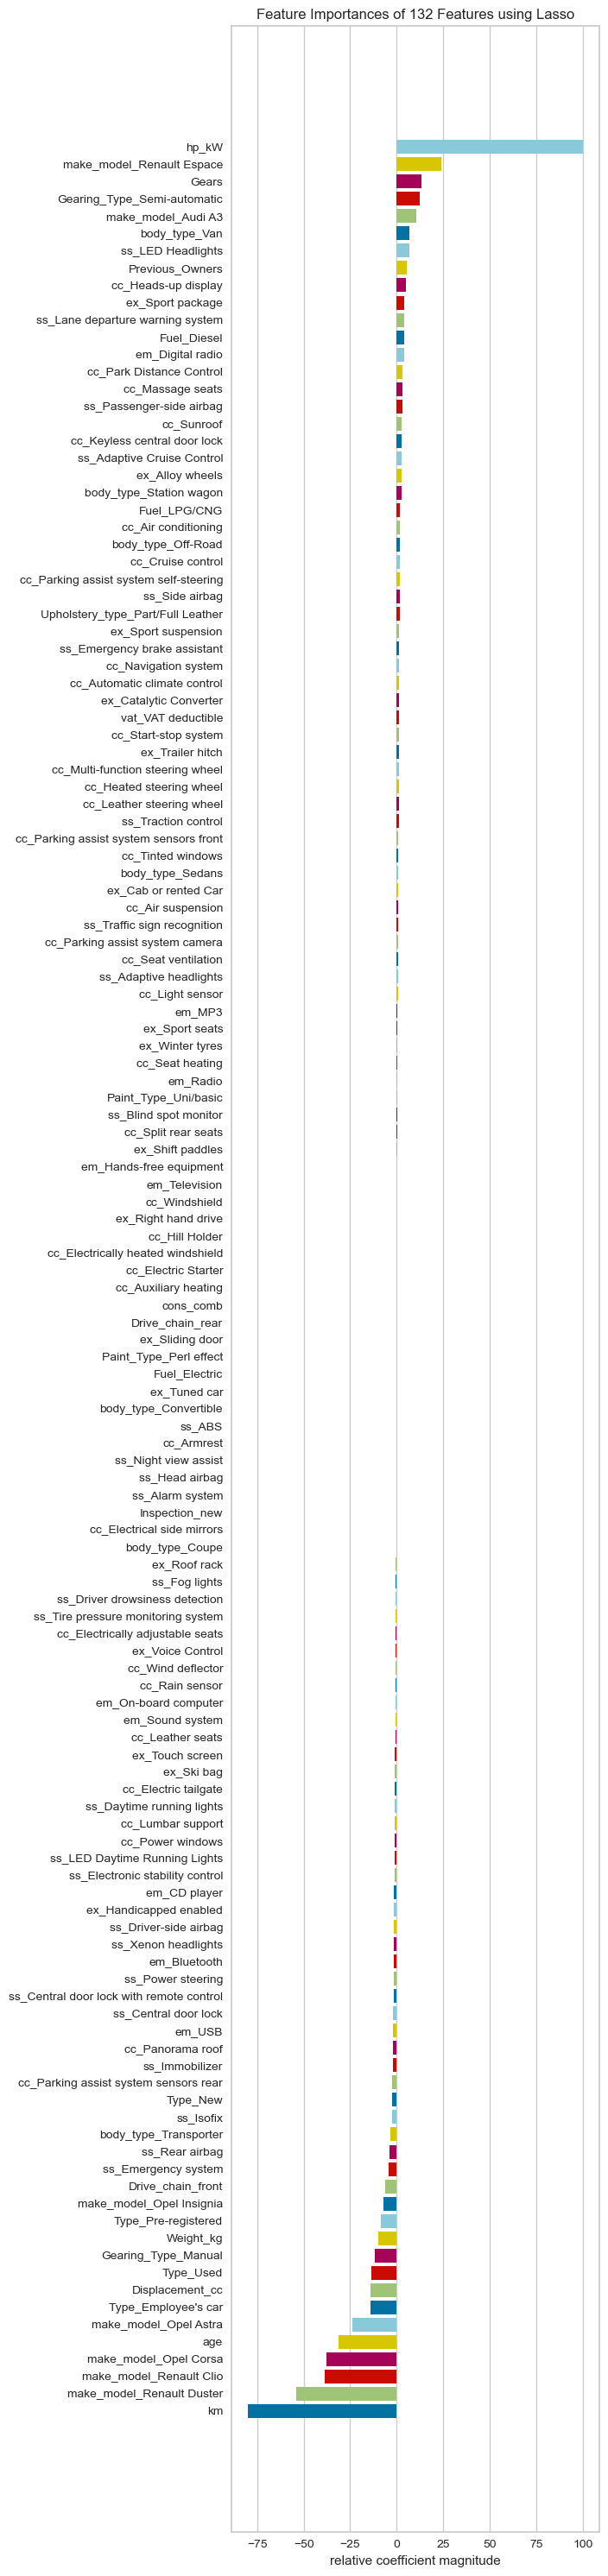

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [115]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# feature selection yapacağımızdan lasso modeli kullanmamız gerektiğini unutmuyoruz.

In [116]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# tahminlemeye en fazla etkisi olan 5 feature'ı seçiyoruz.
# Burda make_model feature neden seçildi şeklinde aklınıza bir soru gelebilir. Yukardaki görsel incelendiğinde
# tahminlemeye en fazla etkisi olan featurlar arasında make_model featurenın unique kategorik
# gözlemlerinin (Audi A3, AudiA1, Renault Espace vb) olduğunu gördüğümüzden make_model featuranı da seçtik.

In [117]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [118]:
# yukarda yaptığımız işlemleri tekrarlıyoruz

df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [119]:
df_new.drop(index=[2614], inplace=True)

In [120]:
df_new = df_new[~(df_new.price > 35000)]

In [121]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False


In [122]:
len(df_new)

15419

In [123]:
# yeni 6 featurlı data setimize göre X ve y mizi belirleyip modeli yeniden kuruyoruz.

X = df_new.drop(columns=["price"])
y = df_new.price

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [125]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [127]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [128]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [129]:
lasso_final_model.best_score_

-2239.588352950935

In [130]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [131]:
2132 / df_new.price.mean()

0.1233209499596912

In [132]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [133]:
# tüm modellerden elde ettiğimiz metricleri scores değişkenine atıyoruz. Daha sonra model isimlerinin
# indexte, metriclerin featurlarda görünmesi maksadıyla df'in transposunu alıyoruz.

scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "final_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144
final_m,0.877,1553.998,2132.539


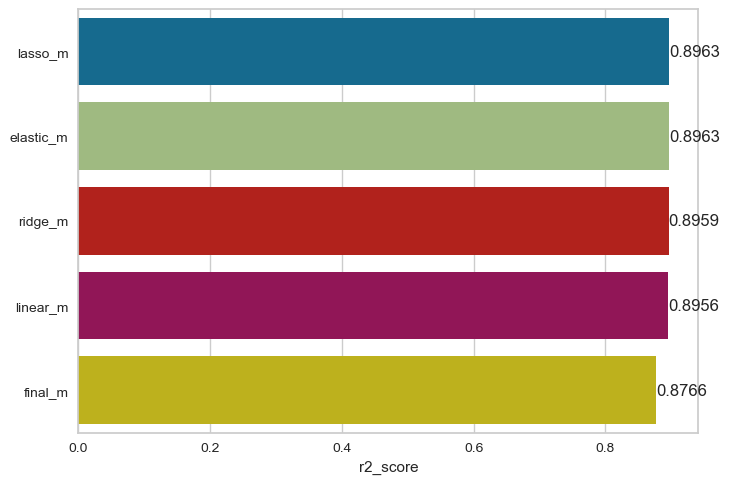

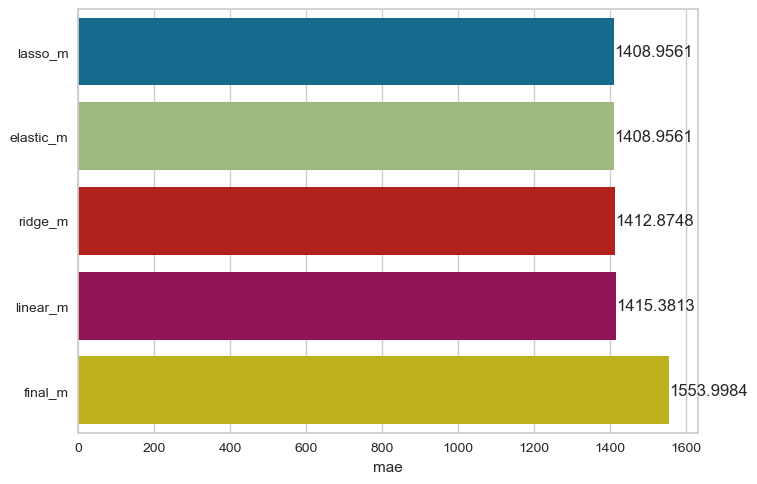

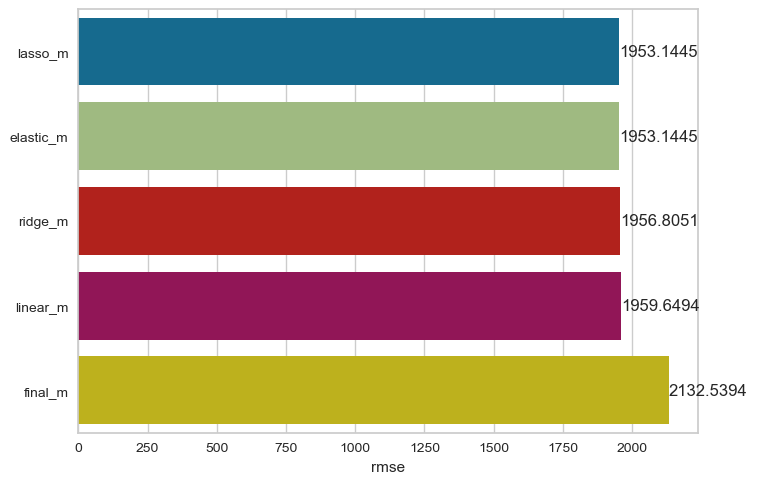

In [134]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Prediction

## Prediction with new observation

In [135]:
# Son aşamada train ve test seti şeklinde ayırım yapmadığımızı unutmayın

final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [136]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [137]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [138]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [139]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [140]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [141]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,True,True


In [142]:
X.head(1)

# predict ettireceğimiz gözlemin feature sıralaması eğitim verdiğimiz datanın feature sıralaması aynı olmalı.

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,True,False,False,False,False,False,False,False,True,False,False


In [143]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,True,0,0,0,0,0,0,True,0,0


In [144]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [145]:
final_model.predict(my_dict)

array([19559.29001107])

## Prediction with random samples

In [146]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [147]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [148]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [149]:
final_model.best_estimator_

Lasso(alpha=0.01)

**Lasso(alpha=0.01) ?**

**alpha**, Lasso regresyonunun regularization şiddetini kontrol eder. Regularization, modelin overfitting eğilimini azaltmak için kullanılır. 

- Eğer alpha değeri 0'a yakın bir değerse (örneğin 0.01), Lasso regülarizasyonu azalır ve model linear regresyona benzer.
- Eğer alpha değeri büyükse, Lasso regülarizasyonu artar ve daha fazla feature katsayısı sıfıra eşitlenir, bu da modelin daha basit hale gelmesine neden olur.

Özetle, modelin overfitting e karşı bir miktar koruma sağladığı, ancak yine de modelin çoğu feature ı kullanmasına izin verdiği anlamına gelir.

In [150]:
random_samples = df_new.sample(n=20)

In [151]:
X_random = random_samples.drop(columns=["price"])

In [152]:
X_random = final_scaler.transform(X_random)

In [153]:
predictions = final_model.predict(X_random)
predictions

array([ 4191.47109829, 13598.66680997, 16720.51638863, 15600.27071371,
       28153.24714345, 15998.47279126, 21690.16890411, 25206.8624935 ,
       17311.62298284, 19779.90431646, 11584.48923866, 23100.28451559,
       11239.78210389, 17484.44705538, 26199.61210187, 11540.49244235,
       23629.30316479, 22298.38229702, 12721.96807617, 23260.11091613])

In [154]:
true_labels = random_samples["price"].values
true_labels

array([ 7800, 11299, 17489, 13290, 32995, 14990, 20900, 31840, 19780,
       19750, 10798, 23300,  9999, 18890, 22790, 11390, 23489, 23940,
       13990, 22900], dtype=int64)

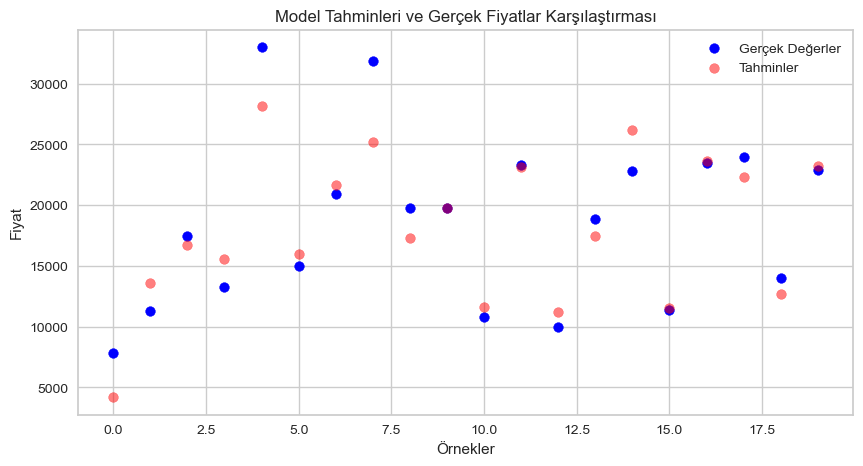

In [155]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Gerçek Değerler')
plt.scatter(range(len(predictions)), predictions, color='red', label='Tahminler', alpha=0.5)
plt.title('Model Tahminleri ve Gerçek Fiyatlar Karşılaştırması')
plt.xlabel('Örnekler')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

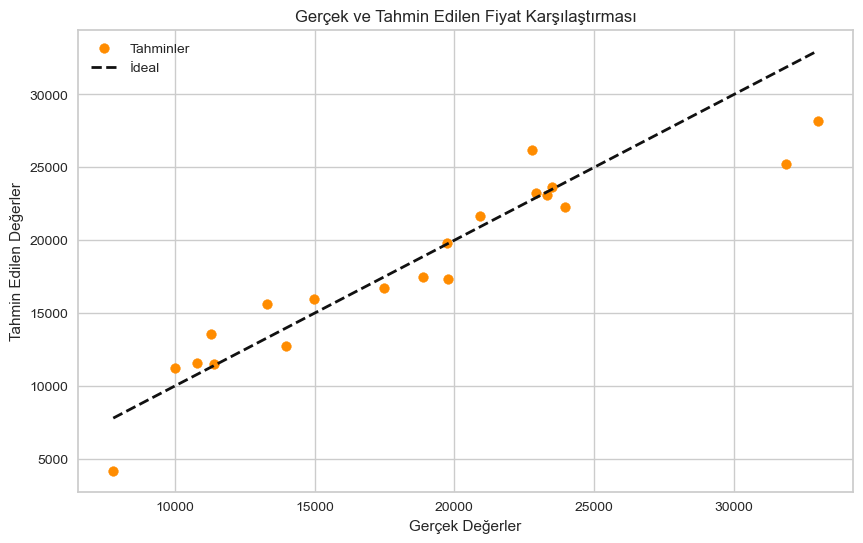

In [156]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='Tahminler')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Fiyat Karşılaştırması')
plt.legend()
plt.show()